In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
Company = pd.read_excel('Company_Data2015-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [5]:
Company.columns = Company.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [6]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital_,Current_Assets_,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [7]:
Company.rename(columns = {'Net_Working_Capital_':'Net_Working_Capital', 
                             'Current_Liabilities_and_Provisions_':'Current_Liabilities_and_Provisions',
                              'Total_Assets_to_Liabilities_':'Total_Assets_to_Liabilities'}, inplace = True)

In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_to_Liabilities   

In [9]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [10]:
Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,16065.388734,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,19776.817379,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,4.000000,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3029.250000,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,6077.500000,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,24269.500000,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,72493.000000,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [11]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Co_Code,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,16065.39,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,19776.82,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,4.00,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3029.25,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,6077.50,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,24269.50,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,72493.00,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [12]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [13]:
Company[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [14]:
Company['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [15]:
Company['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [16]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 68 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block_                         3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets_                      3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_to_Liabilities   

In [ ]:
pd.set_option("display.max_rows", None)
Company.isnull().sum()

Co_Code                                  0
Co_Name                                  0
Networth_Next_Year                       0
Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block_                             0
Net_Working_Capital                      0
Current_Assets_                          0
Current_Liabilities_and_Provisions       0
Total_Assets_to_Liabilities              0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Production                       0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PA

In [ ]:
Company.size

243848

Current_Ratio[Latest]                   1
Fixed_Assets_Ratio[Latest]              1
Inventory_Ratio[Latest]                 1
Debtors_Ratio[Latest]                   1
Total_Asset_Turnover_Ratio[Latest]      1
Interest_Cover_Ratio[Latest]            1
PBIDTM_perc[Latest]                     1
PBITM_perc[Latest]                      1
PBDTM_perc[Latest]                      1
CPM_perc[Latest]                        1
APATM_perc[Latest]                      1
Book_Value_Adj._Unit_Curr               4
Inventory_Velocity_Days               103
dtype: int64

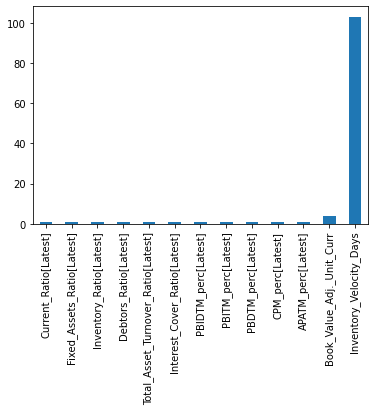

In [ ]:
# first we'll visualize null count
null_in_company = Company.isnull().sum()
null_in_company = null_in_company[null_in_company > 0]
null_in_company.sort_values(inplace=True)
null_in_company.plot.bar();
null_in_company

In [ ]:
Company.isin([0]).sum()

Co_Code                                   0
Co_Name                                   0
Networth_Next_Year                        1
Equity_Paid_Up                            1
Networth                                  3
Capital_Employed                          5
Total_Debt                              844
Gross_Block_                            390
Net_Working_Capital                      48
Current_Assets_                          27
Current_Liabilities_and_Provisions       98
Total_Assets_to_Liabilities               3
Gross_Sales                             305
Net_Sales                               306
Other_Income                            690
Value_Of_Output                         290
Cost_of_Production                      159
Selling_Cost                            938
PBIDT                                   102
PBDT                                    108
PBIT                                    109
PBT                                     119
PAT                             

In [ ]:
Company.eq(0).sum().sum()

37881

In [ ]:
Company.eq(0).sum().sort_values(ascending = False)/Company.index.size

default                               0.89
Capital_expenses_in_forex             0.81
ROG-Revenue_earnings_in_forex_perc    0.63
Revenue_earnings_in_forex             0.62
ROG-Revenue_expenses_in_forex_perc    0.55
Revenue_expenses_in_forex             0.53
ROG-Market_Capitalisation_perc        0.40
Market_Capitalisation                 0.35
Inventory_Velocity_Days               0.31
Inventory_Ratio[Latest]               0.31
Interest_Cover_Ratio[Latest]          0.28
ROG-Gross_Block_perc                  0.26
Selling_Cost                          0.26
Total_Debt                            0.24
Debtors_Ratio[Latest]                 0.21
Debtors_Velocity_Days                 0.20
Creditors_Velocity_Days               0.20
Other_Income                          0.19
Cash_Flow_From_Financing_Activities   0.18
Value_of_Output_to_Gross_Block        0.17
Fixed_Assets_Ratio[Latest]            0.17
Cash_Flow_From_Investing_Activities   0.14
Total_Asset_Turnover_Ratio[Latest]    0.14
Value_of_Ou

## **RANDOM FOREST MODELING**

One of the requirements for a logistic regression is that the independent variables have little or no multicollinearity between them (i.e. should not be too highly correlated with each other). So, a potential risk is if a substantial portion of the values in your variables are zeroes, this could increase the correlation between them.




*But, For the random forest, or decision trees to put it simply, having 0 has absolutely no effect. You can add 1 to all your samples and obtain the same decision tree again since it just sorts the feature values and finds a threshold.*



**Great with High dimensionality** : Random forests is great with high dimensional data since we are working with subsets of data.

**Robust to Outliers and Non-linear Data**: Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.

In [ ]:
Company_X = Company.drop(['default', 'Co_Name', 'Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up'], axis = 1)
Company_Y = Company['default']

In [ ]:
Company_X_new = np.nan_to_num(Company_X)   #replace nan with zero and inf with finite numbers

In [ ]:
np.where(np.isnan(Company_X_new))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(np.isnan(Company_X))

(array([  24,   97,  153,  168,  170,  202,  277,  289,  318,  323,  347,
         393,  476,  508,  518,  598,  687,  775,  834,  854,  878,  917,
         920,  937,  938,  959, 1037, 1083, 1150, 1170, 1214, 1221, 1241,
        1292, 1335, 1365, 1372, 1387, 1412, 1500, 1516, 1575, 1586, 1716,
        1775, 1905, 1916, 2006, 2009, 2032, 2134, 2140, 2144, 2212, 2235,
        2296, 2390, 2449, 2455, 2463, 2524, 2535, 2617, 2655, 2667, 2691,
        2717, 2772, 2781, 2788, 2814, 2825, 2825, 2825, 2825, 2825, 2825,
        2825, 2825, 2825, 2825, 2825, 2861, 2887, 2900, 2915, 2919, 2938,
        2949, 2961, 2984, 3001, 3013, 3040, 3068, 3069, 3094, 3112, 3136,
        3174, 3189, 3203, 3204, 3235, 3251, 3293, 3300, 3317, 3366, 3387,
        3389, 3441, 3491, 3517, 3525, 3543, 3579, 3581]),
 array([60, 60, 60, 60, 60, 60, 60, 60, 25, 60, 60, 60, 60, 60, 60, 60, 60,
        60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60,
        60, 60, 60, 60, 60, 60, 25, 60, 60, 60, 60

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Company_X_new, Company_Y, 
                                                    test_size = 0.33, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
rfc=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'min_samples_split': [150, 300],
    'min_samples_leaf': [50, 100],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 200}

In [ ]:
CV_rfc.best_estimator_

In [ ]:
rfc1 = RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=150,
                              n_estimators=200, max_features='auto', random_state=42, criterion='gini')

In [ ]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=150,
                       n_estimators=200, random_state=42)

In [ ]:
ytrain_predict = rfc1.predict(X_train)
ytest_predict = rfc1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2157
           1       0.92      0.87      0.89       245

    accuracy                           0.98      2402
   macro avg       0.95      0.93      0.94      2402
weighted avg       0.98      0.98      0.98      2402



In [ ]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1041
           1       0.92      0.90      0.91       143

    accuracy                           0.98      1184
   macro avg       0.95      0.95      0.95      1184
weighted avg       0.98      0.98      0.98      1184



AUC: 0.990


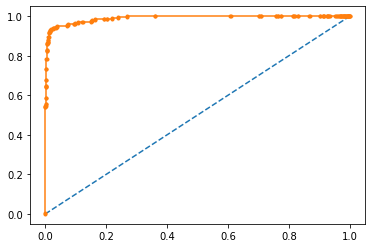

In [ ]:
# AUC and ROC for the training data

# predict probabilities
probs = rfc1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.991


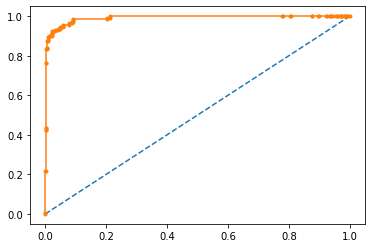

In [ ]:
# AUC and ROC for the test data


# predict probabilities
probs = rfc1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

Conclusion



The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Here, AUC on the training data is 99.0% and on test data is 99.1%., is very high indicates no overfitting or underfitting has happened. and the model is performing very well in predicting the positive and negative classes correctly.

This model is exhibiting the characteristics of an ideal system with high precision and high recall meaning it will return many results, with all results labeled correctly. Because Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results.

This Random Forest Model could definitely be used for the production.

- Firstly, we drop all those features with zero values greater than 30%

In [18]:
Company_new = Company.drop(['Capital_expenses_in_forex', 'ROG-Revenue_earnings_in_forex_perc', 'Revenue_earnings_in_forex', 
                            'ROG-Revenue_expenses_in_forex_perc', 'Revenue_expenses_in_forex', 'ROG-Market_Capitalisation_perc',
                            'Market_Capitalisation', 'Inventory_Velocity_Days', 'Inventory_Ratio[Latest]'],axis=1)

In [19]:
Company_new.shape

(3586, 59)

In [ ]:
Company_new.eq(0).sum().sum()

21716

In [ ]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(Company[column].describe(),end="\n")
    print(" ")
    
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharex=False, figsize=(15,3));
    sns.histplot(data=Company, x= Company[column], kde=True, ax=ax1)
    ax1.tick_params(axis='x', labelrotation=90)
    sns.boxplot(x=Company[column], data=Company, ax=ax2)
    ax2.tick_params(axis='x', labelrotation=90);

In [ ]:
num = Company.select_dtypes(include = ['float64','int64'])
lstnumericcolumns = list(num.columns.values)
lst = lstnumericcolumns[:10]

In [ ]:
lst1 = lstnumericcolumns[10:20]

In [ ]:
lst2 = lstnumericcolumns[20:30]

In [ ]:
lst3 = lstnumericcolumns[30:40]

In [ ]:
lst4 = lstnumericcolumns[50:60]

In [ ]:
lst5 = lstnumericcolumns[60:]

Description of Co_Code
----------------------------------------------------------------------------
count    3586.00
mean    16065.39
std     19776.82
min         4.00
25%      3029.25
50%      6077.50
75%     24269.50
max     72493.00
Name: Co_Code, dtype: float64
 
Description of Networth_Next_Year
----------------------------------------------------------------------------
count     3586.00
mean       725.05
std       4769.68
min      -8021.60
25%          3.98
50%         19.02
75%        123.80
max     111729.10
Name: Networth_Next_Year, dtype: float64
 
Description of Equity_Paid_Up
----------------------------------------------------------------------------
count    3586.00
mean       62.97
std       778.76
min         0.00
25%         3.75
50%         8.29
75%        19.52
max     42263.46
Name: Equity_Paid_Up, dtype: float64
 
Description of Networth
----------------------------------------------------------------------------
count    3586.00
mean      649.75
std      4091.99


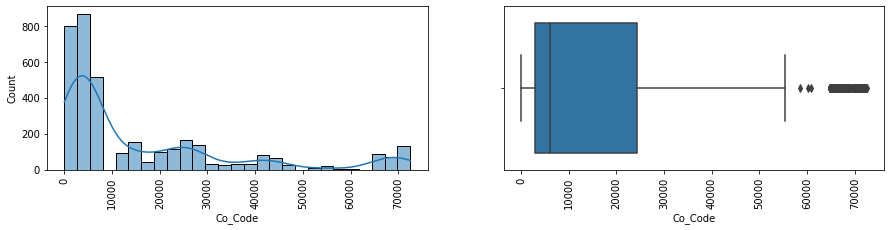

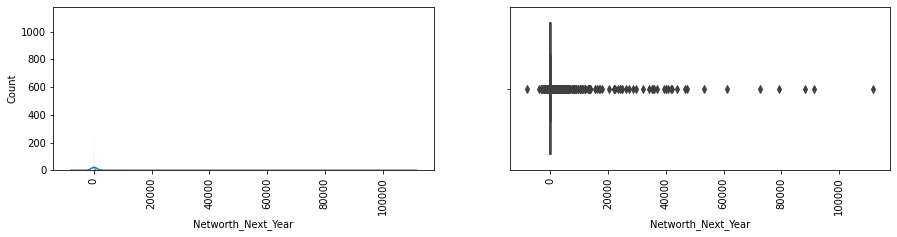

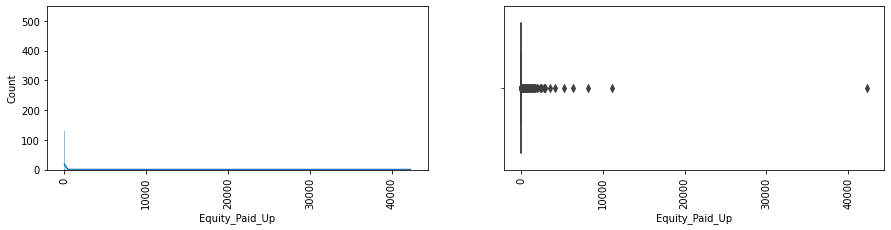

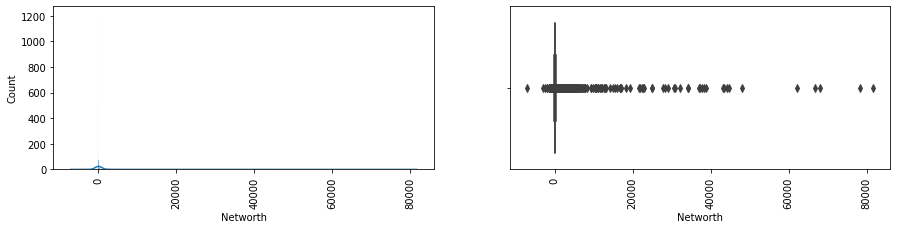

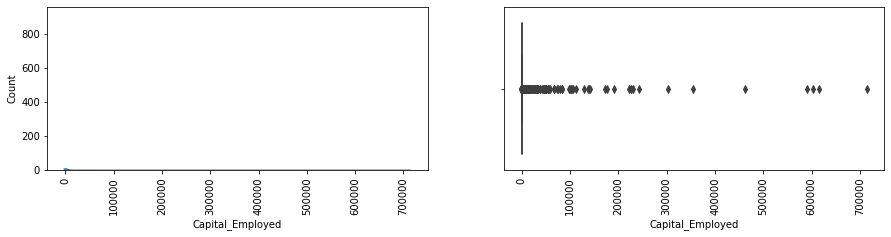

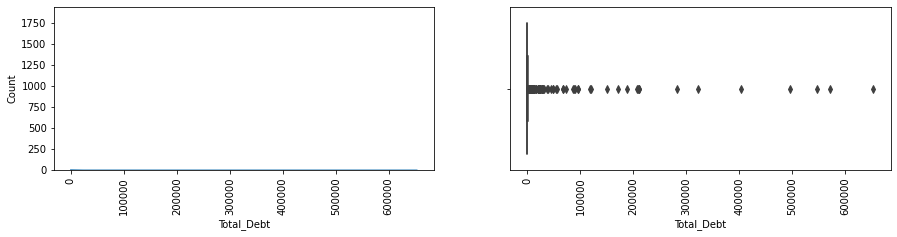

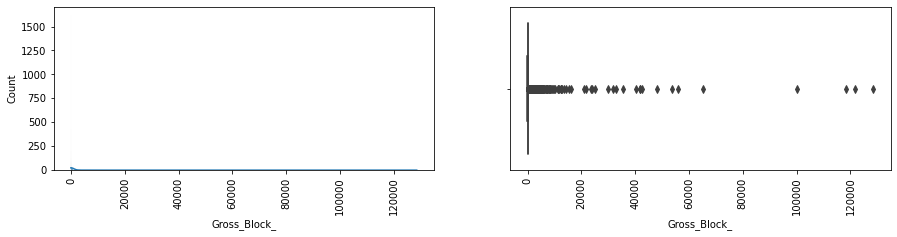

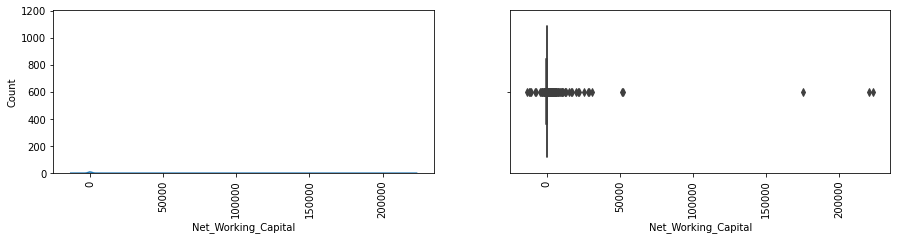

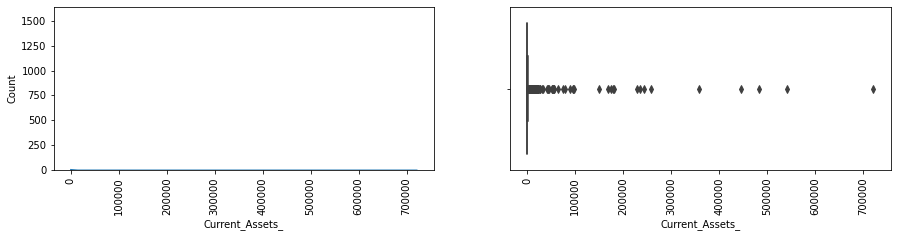

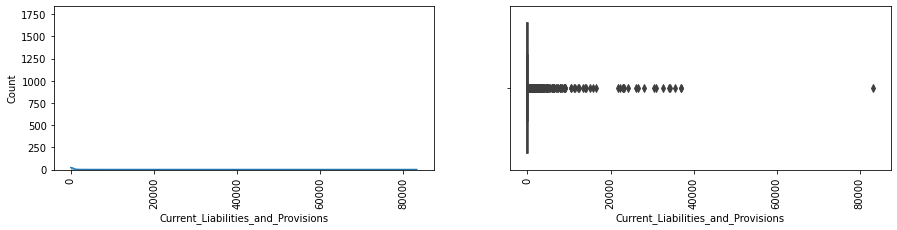

In [ ]:
for x in lst:
    univariateAnalysis_numeric(x,20)

Description of Total_Assets_to_Liabilities
----------------------------------------------------------------------------
count     3586.00
mean      1778.45
std      11437.57
min         -4.51
25%         10.55
50%         52.01
75%        310.54
max     254737.22
Name: Total_Assets_to_Liabilities, dtype: float64
 
Description of Gross_Sales
----------------------------------------------------------------------------
count     3586.00
mean      1123.74
std      10603.70
min        -62.59
25%          1.44
50%         31.21
75%        242.25
max     474182.94
Name: Gross_Sales, dtype: float64
 
Description of Net_Sales
----------------------------------------------------------------------------
count     3586.00
mean      1079.70
std       9996.57
min        -62.59
25%          1.44
50%         30.44
75%        234.44
max     443775.16
Name: Net_Sales, dtype: float64
 
Description of Other_Income
----------------------------------------------------------------------------
count    3586.0

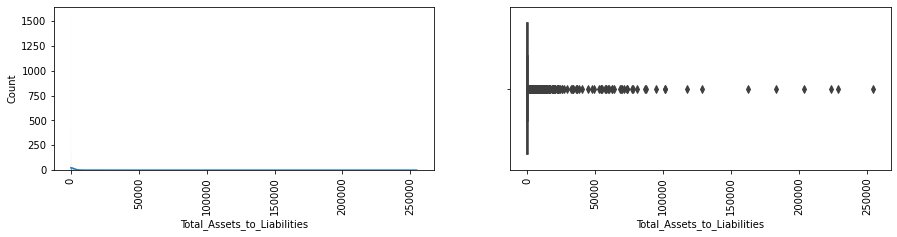

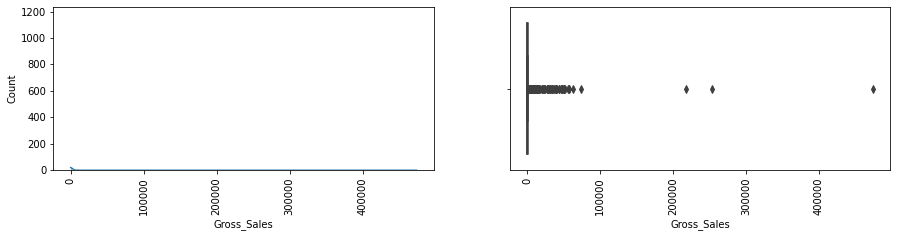

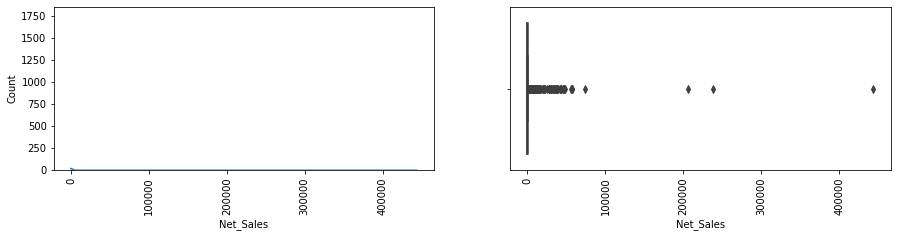

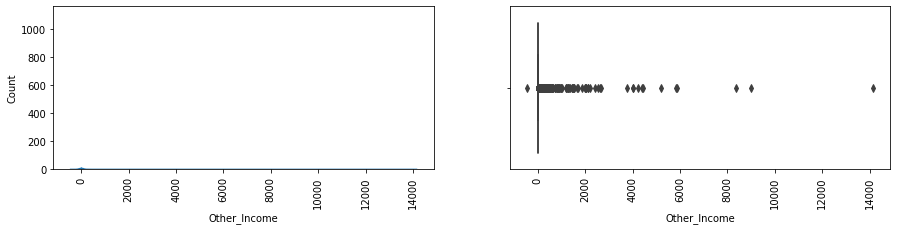

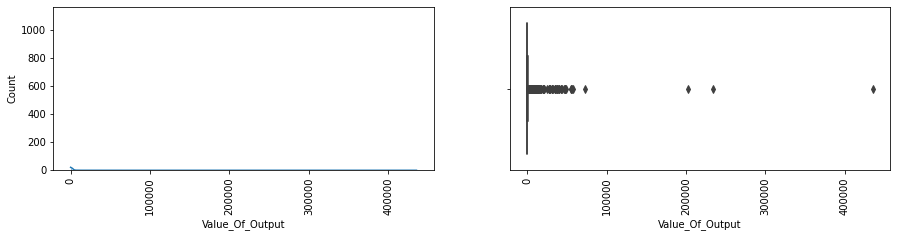

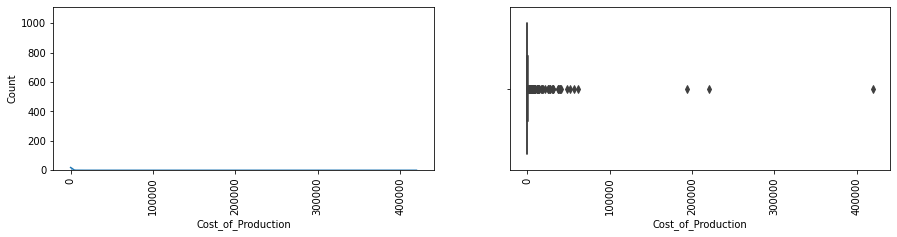

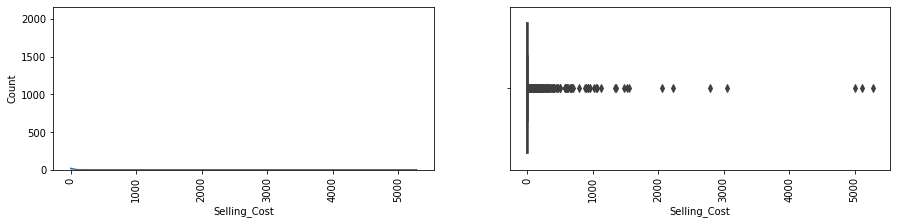

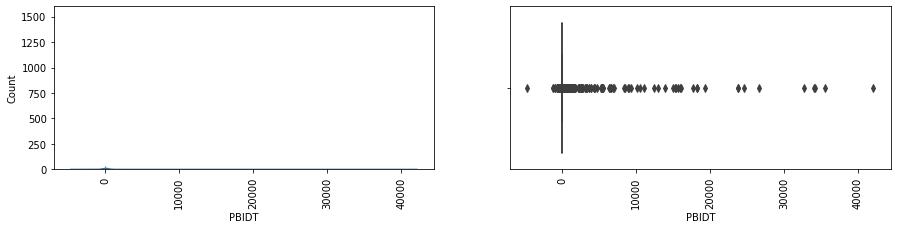

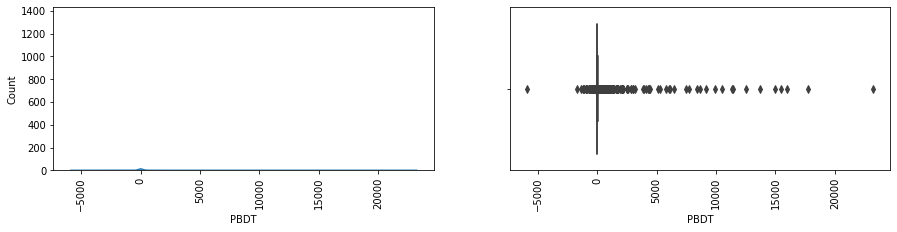

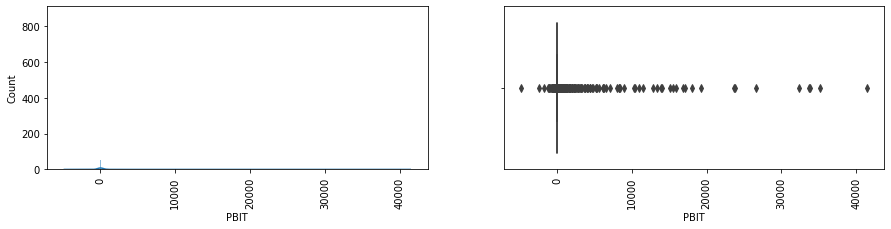

In [ ]:
for x in lst1:
    univariateAnalysis_numeric(x,20)

Description of PBT
----------------------------------------------------------------------------
count    3586.00
mean       85.75
std       799.93
min     -6032.34
25%        -0.06
50%         0.31
75%         7.42
max     16798.00
Name: PBT, dtype: float64
 
Description of PAT
----------------------------------------------------------------------------
count    3586.00
mean       61.22
std       620.30
min     -6032.34
25%        -0.06
50%         0.26
75%         5.54
max     13383.39
Name: PAT, dtype: float64
 
Description of Adjusted_PAT
----------------------------------------------------------------------------
count    3586.00
mean       60.06
std       580.43
min     -4418.72
25%        -0.09
50%         0.21
75%         5.34
max     13384.11
Name: Adjusted_PAT, dtype: float64
 
Description of CP
----------------------------------------------------------------------------
count    3586.00
mean       91.73
std       780.79
min     -5874.53
25%         0.00
50%         0.74
75%  

KeyboardInterrupt: ignored

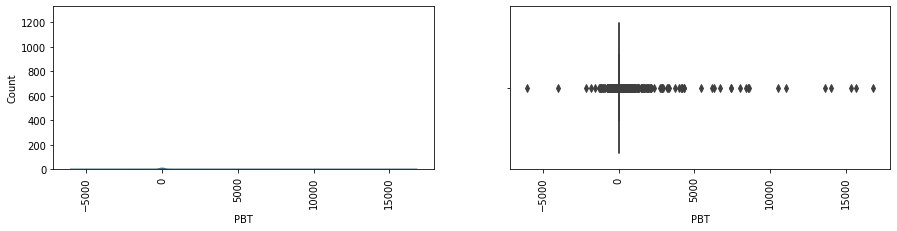

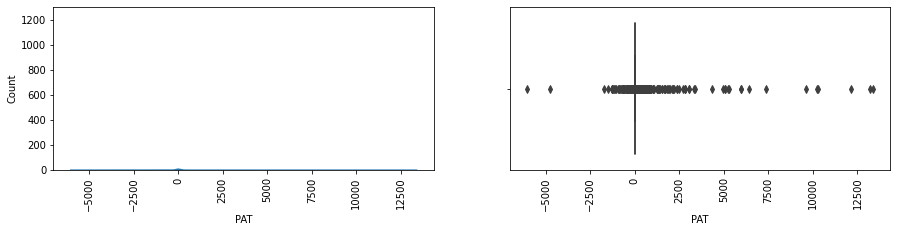

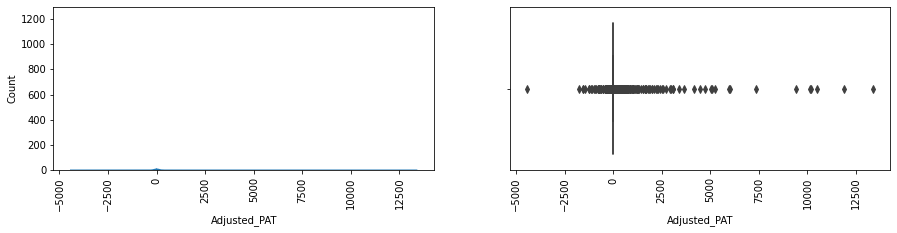

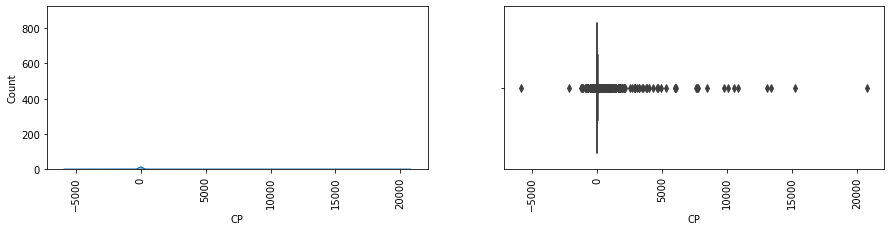

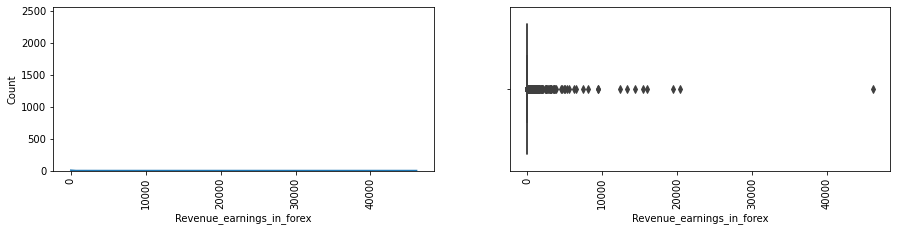

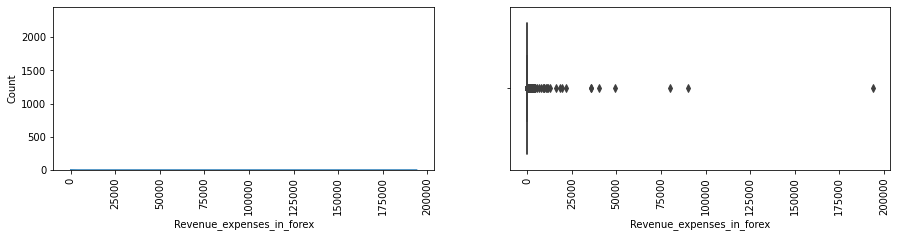

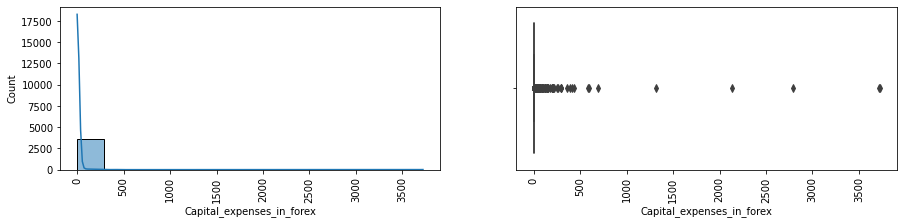

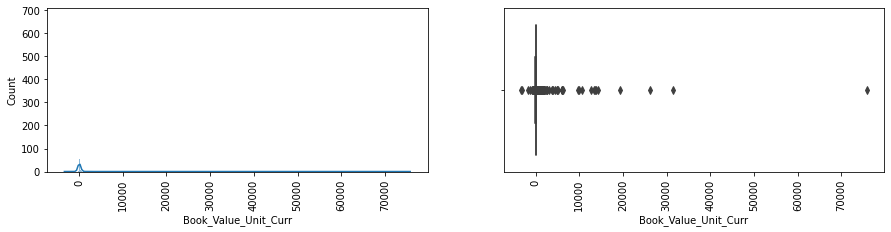

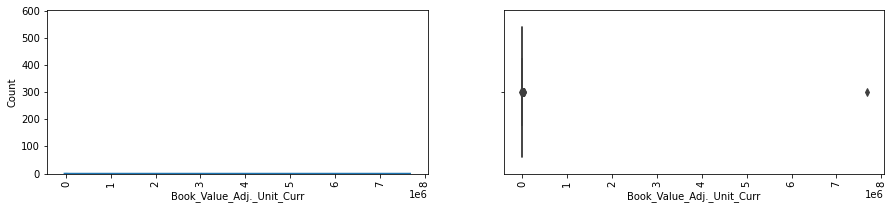

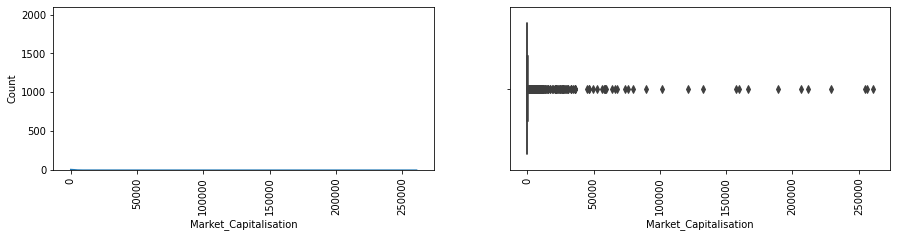

In [ ]:
for x in lst2:
    univariateAnalysis_numeric(x,20)

Description of CEPS_annualised_Unit_Curr
----------------------------------------------------------------------------
count    3586.00
mean       36.02
std       828.42
min     -1808.00
25%         0.00
50%         1.15
75%         8.77
max     45438.44
Name: CEPS_annualised_Unit_Curr, dtype: float64
 
Description of Cash_Flow_From_Operating_Activities
----------------------------------------------------------------------------
count     3586.00
mean        65.77
std       1455.05
min     -25469.23
25%         -0.31
50%          0.45
75%         12.65
max      44529.40
Name: Cash_Flow_From_Operating_Activities, dtype: float64
 
Description of Cash_Flow_From_Investing_Activities
----------------------------------------------------------------------------
count     3586.00
mean       -60.87
std        701.97
min     -23843.45
25%         -5.12
50%         -0.12
75%          0.12
max       3732.98
Name: Cash_Flow_From_Investing_Activities, dtype: float64
 
Description of Cash_Flow_From_Fi

KeyboardInterrupt: ignored

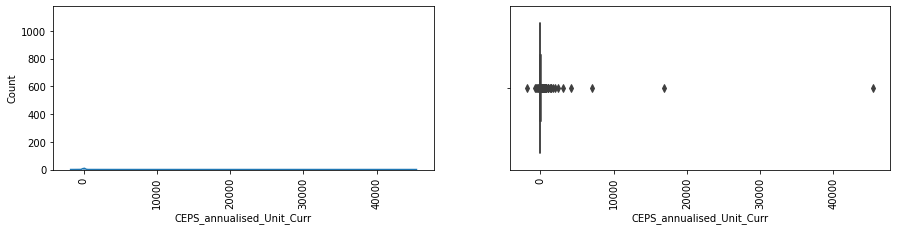

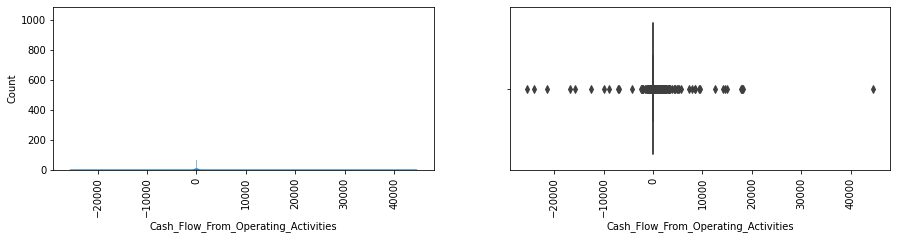

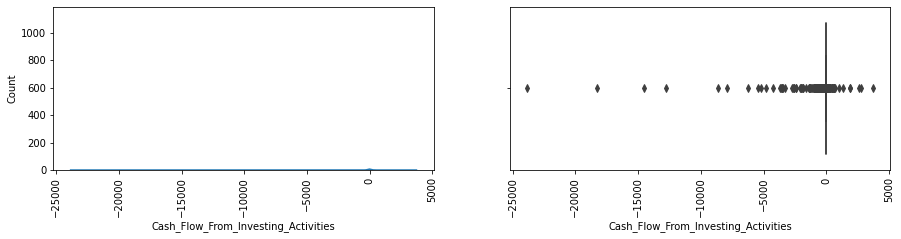

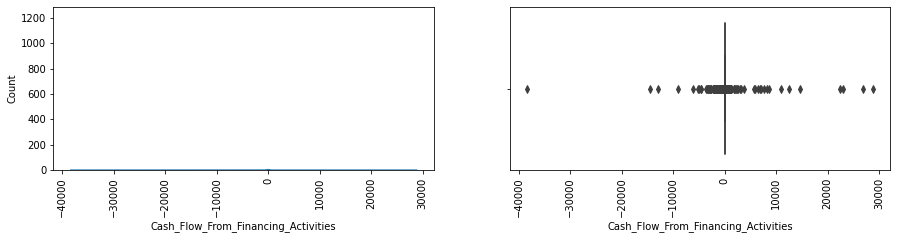

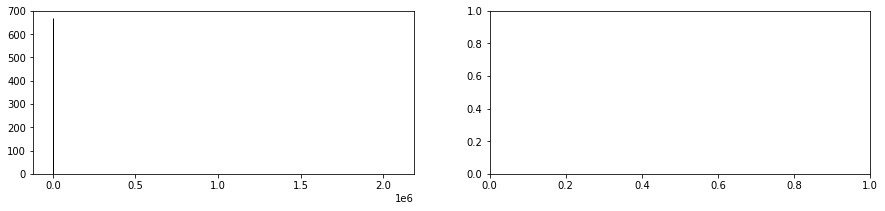

In [ ]:
for x in lst3:
    univariateAnalysis_numeric(x,20)

Description of APATM_perc[Latest]
----------------------------------------------------------------------------
count      3585.00
mean       -365.06
std       12500.05
min     -688600.00
25%           0.00
50%           1.59
75%           7.41
max       15266.67
Name: APATM_perc[Latest], dtype: float64
 
Description of Debtors_Velocity_Days
----------------------------------------------------------------------------
count     3586.00
mean       603.89
std      10636.76
min          0.00
25%          8.00
50%         49.00
75%        106.00
max     514721.00
Name: Debtors_Velocity_Days, dtype: float64
 
Description of Creditors_Velocity_Days
----------------------------------------------------------------------------
count      3586.00
mean       2057.85
std       54169.48
min           0.00
25%           8.00
50%          39.00
75%          89.00
max     2034145.00
Name: Creditors_Velocity_Days, dtype: float64
 
Description of Inventory_Velocity_Days
-----------------------------------

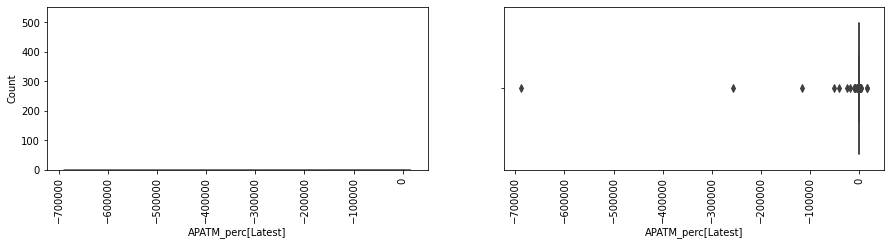

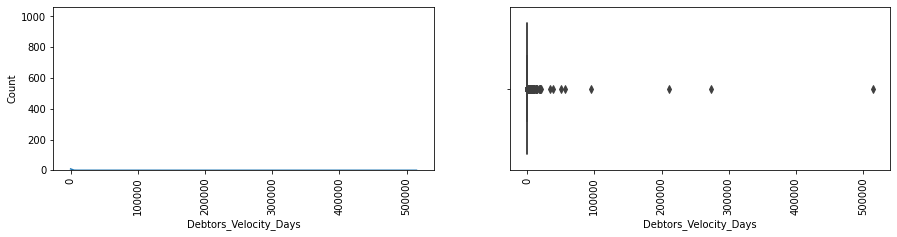

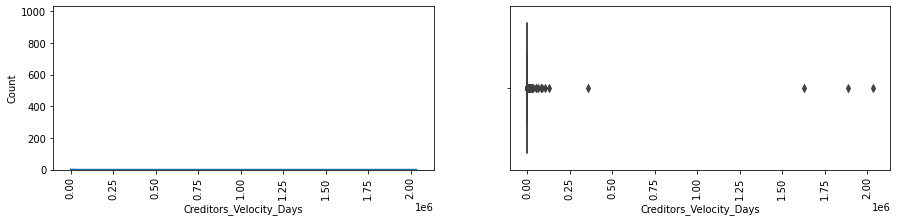

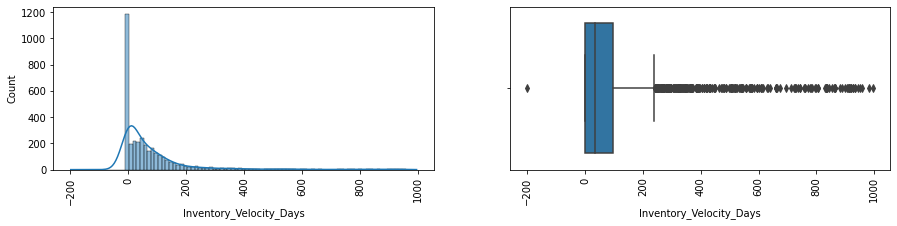

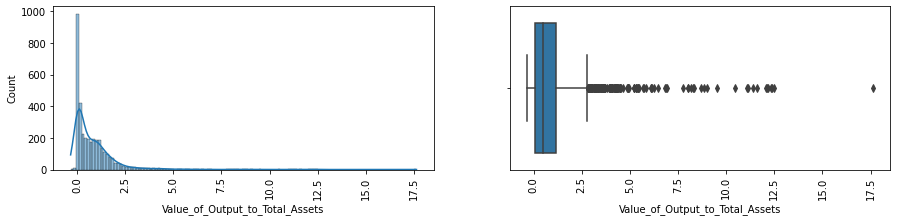

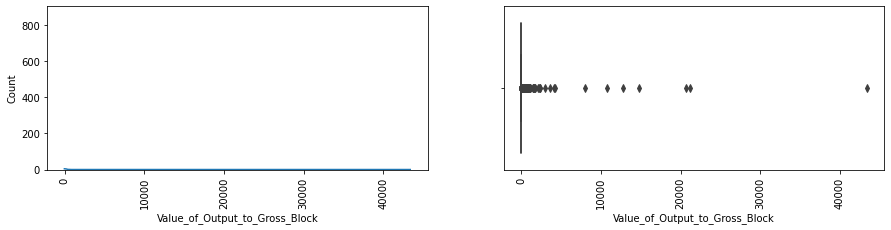

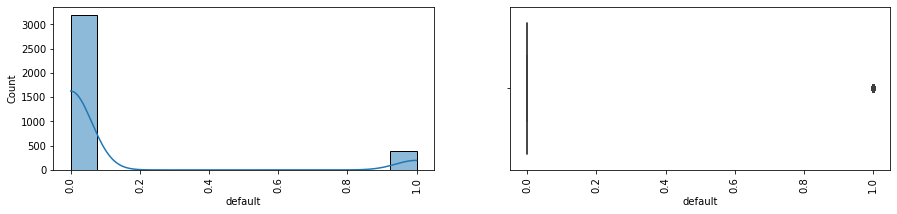

In [ ]:
for x in lst5:
    univariateAnalysis_numeric(x,20)

In [ ]:
import seaborn as sns

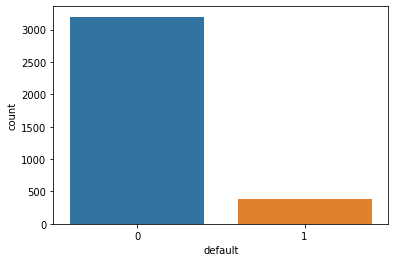

In [ ]:
sns.countplot(x= Company['default']); # hue= Company['cut']);

In [ ]:
def bivariateAnalysis(column):
    fig, (ax) = plt.subplots(ncols=1, nrows=1, sharex=False, figsize=(10,3));
    sns.barplot(data=Company, x = 'default', y= Company[column], ci=None);    
    ax.tick_params(axis='x', labelrotation=90);
    ax.set_title("Variation of Default with " + column)

In [ ]:
num = Company.select_dtypes(include = ['float64'])
lstnumericcolumns = list(num.columns.values)
lst = lstnumericcolumns[:10]

In [ ]:
lst1 = lstnumericcolumns[10:20]

In [ ]:
lst2 = lstnumericcolumns[20:30]

In [ ]:
lst3 = lstnumericcolumns[30:40]

In [ ]:
lst4 = lstnumericcolumns[40:50]

In [ ]:
lst5 = lstnumericcolumns[50:60]

In [ ]:
lst6 = lstnumericcolumns[60:]

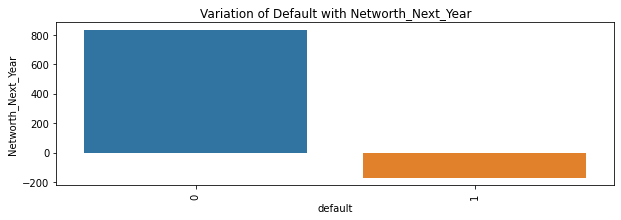

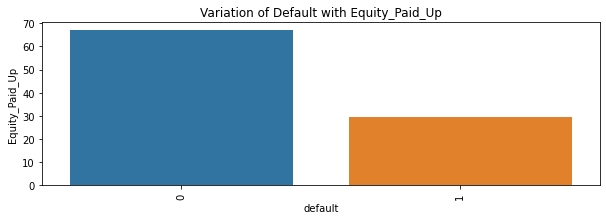

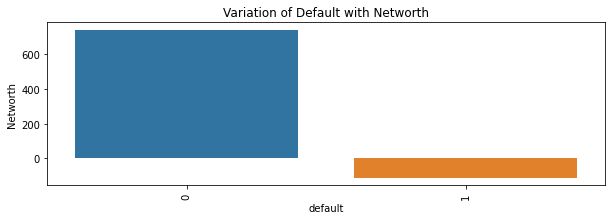

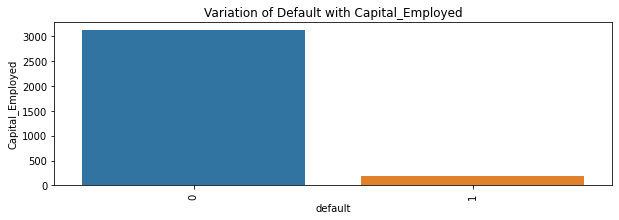

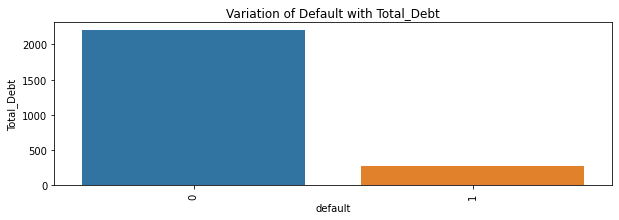

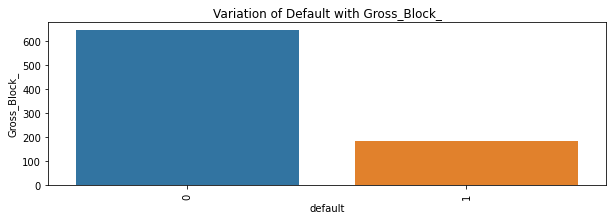

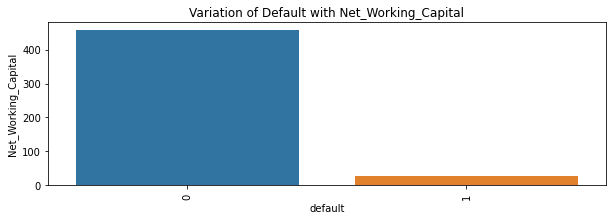

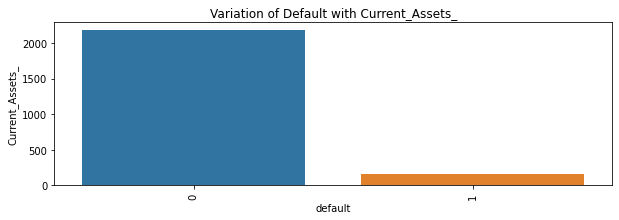

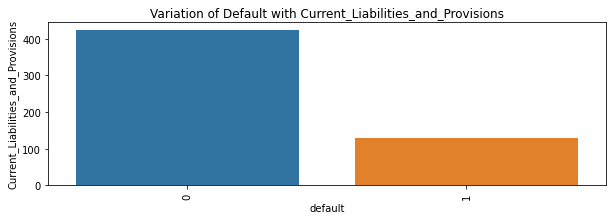

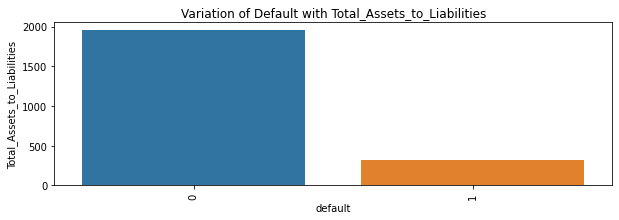

In [ ]:
for x in lst:
    bivariateAnalysis(x)

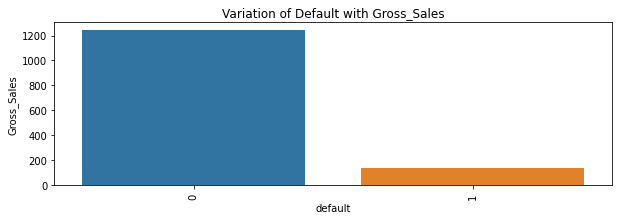

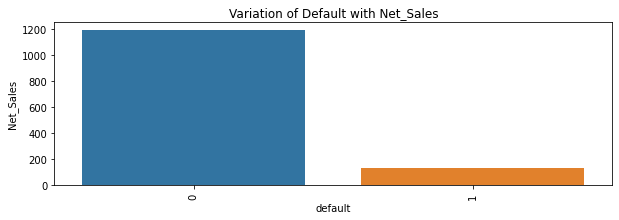

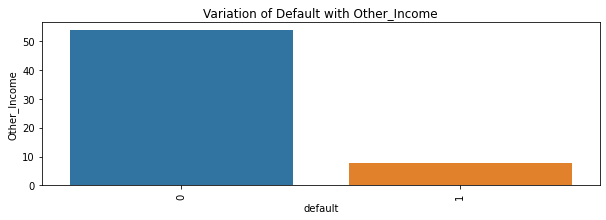

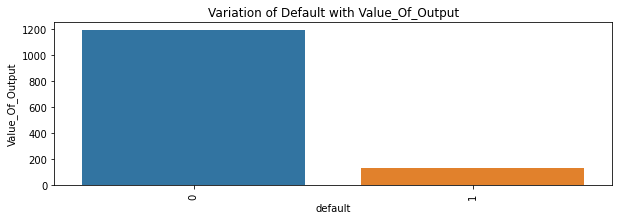

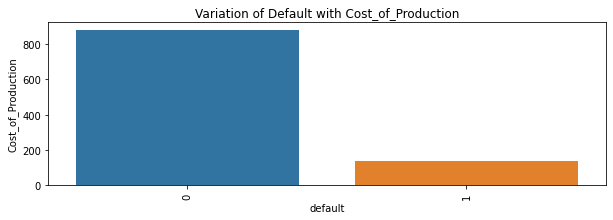

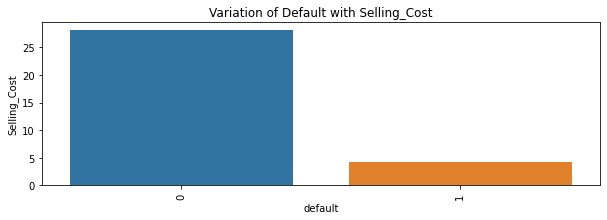

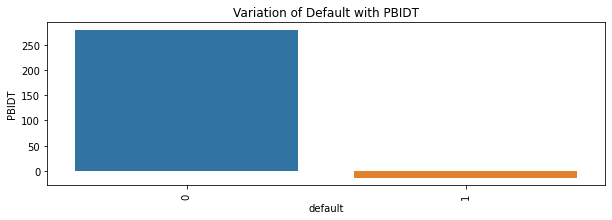

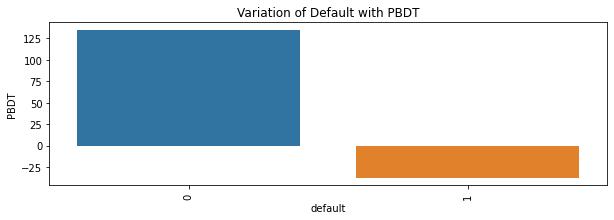

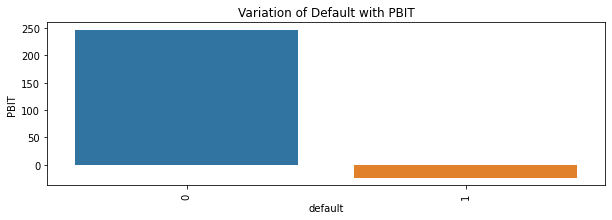

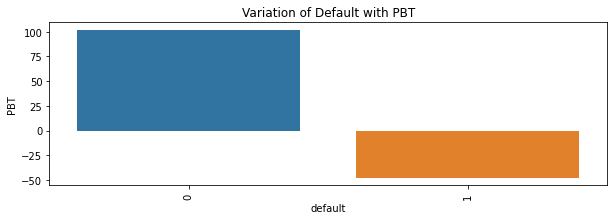

In [ ]:
for x in lst1:
    bivariateAnalysis(x)

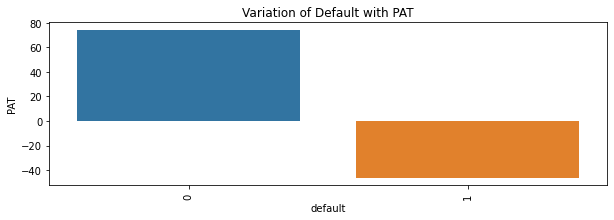

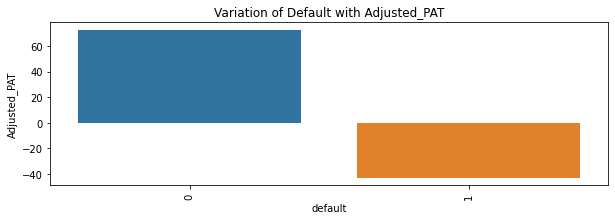

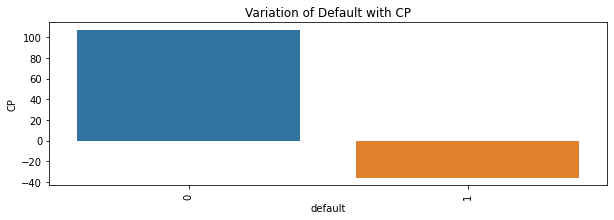

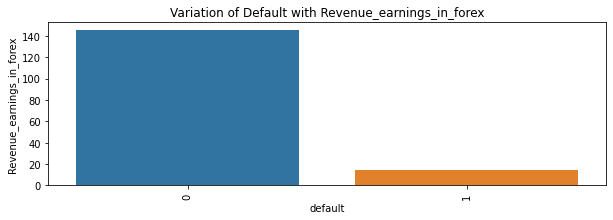

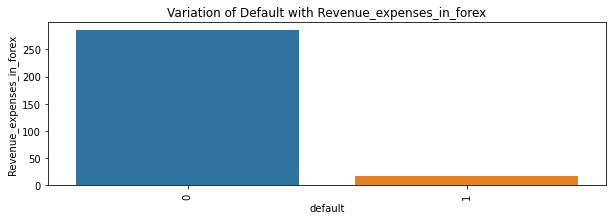

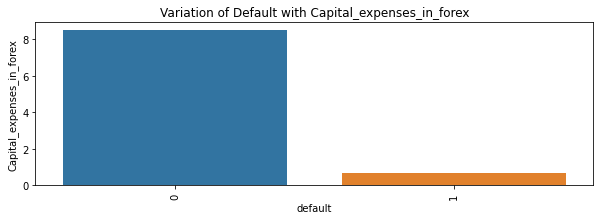

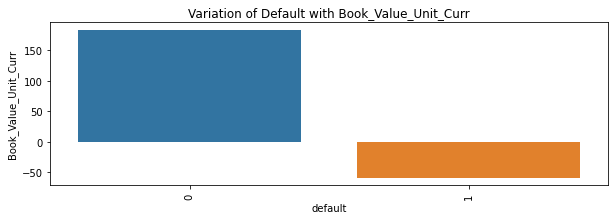

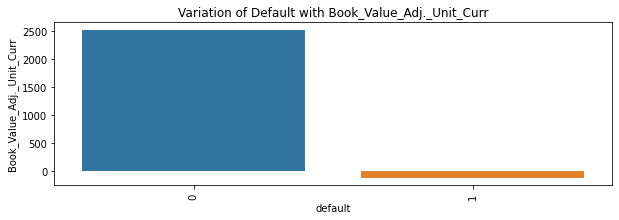

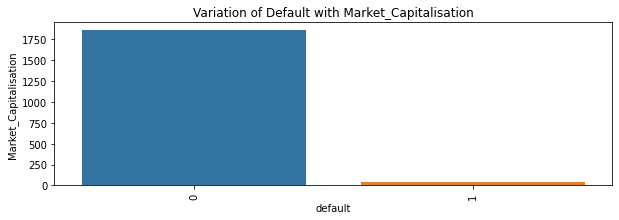

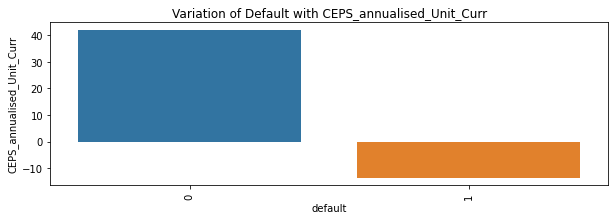

In [ ]:
for x in lst2:
    bivariateAnalysis(x)

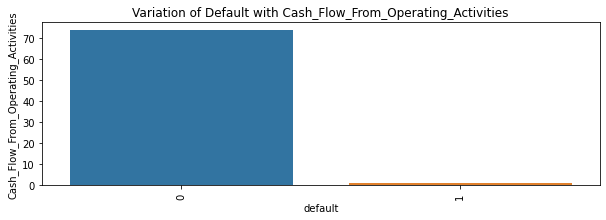

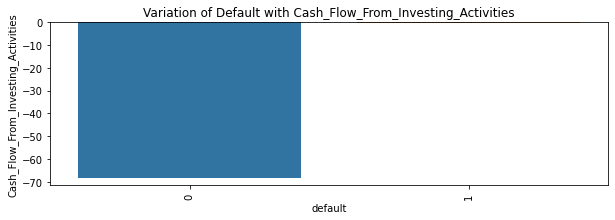

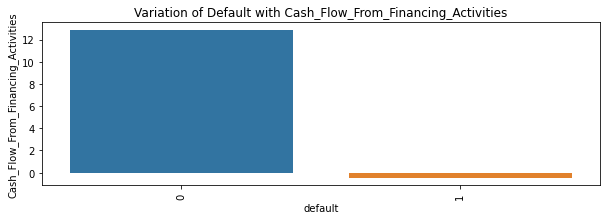

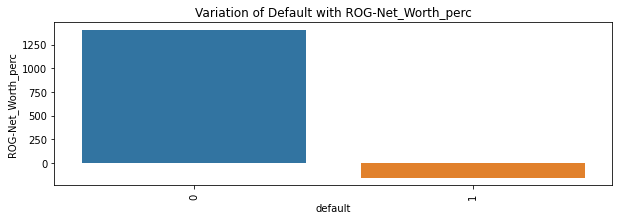

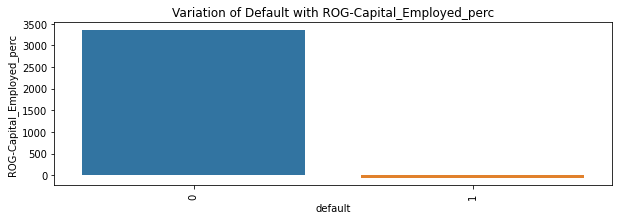

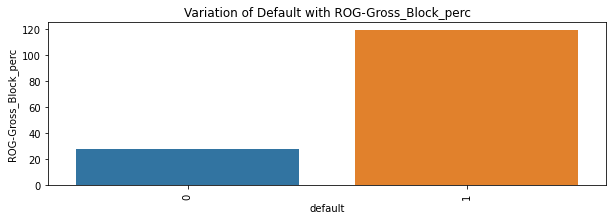

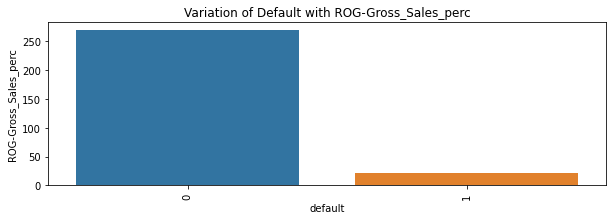

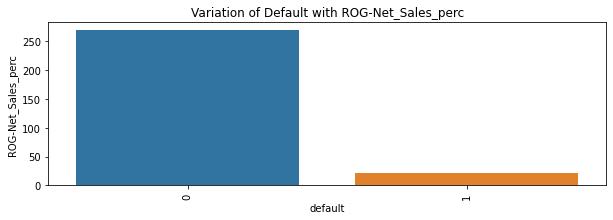

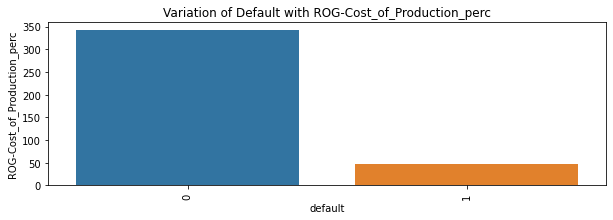

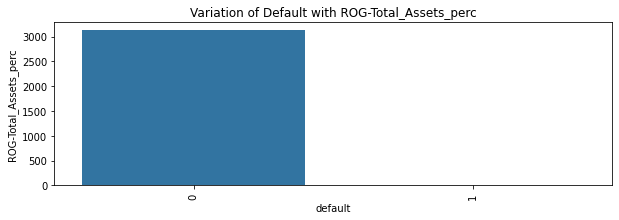

In [ ]:
for x in lst3:
    bivariateAnalysis(x)

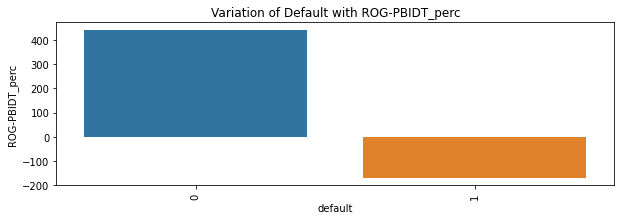

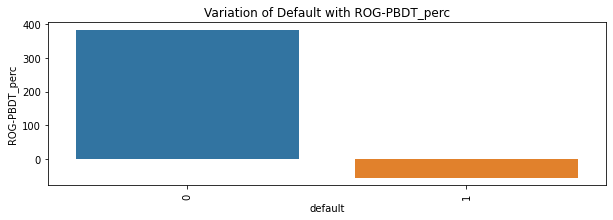

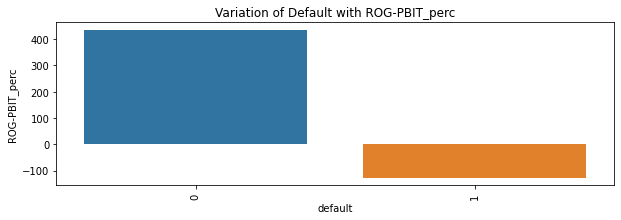

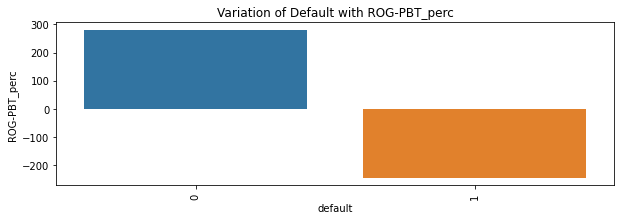

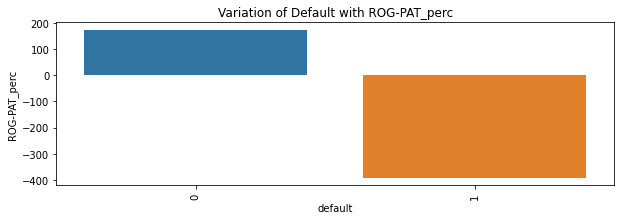

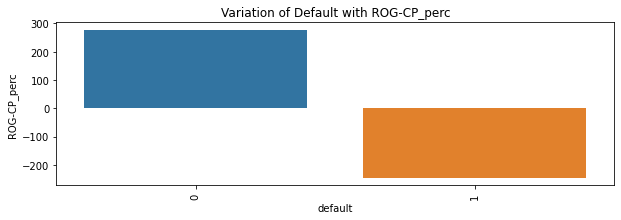

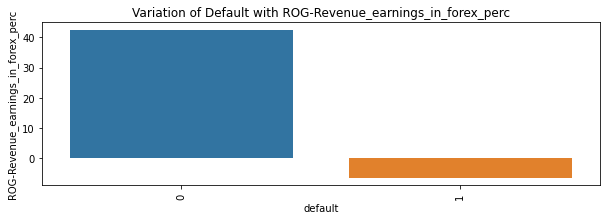

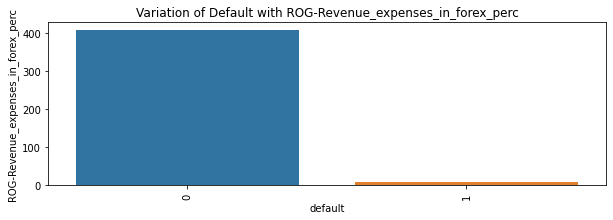

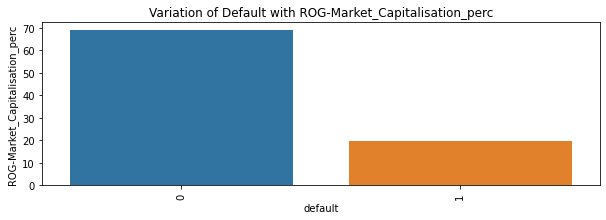

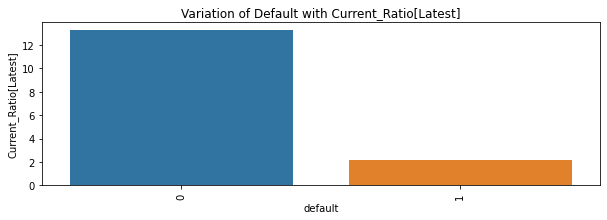

In [ ]:
for x in lst4:
    bivariateAnalysis(x)

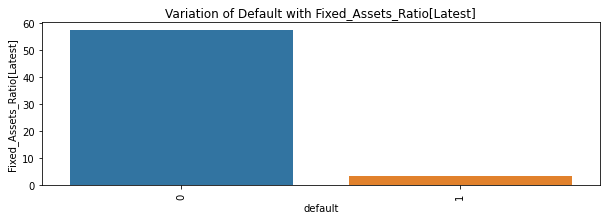

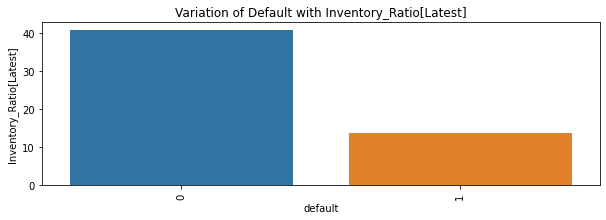

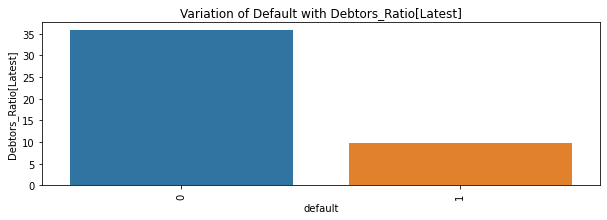

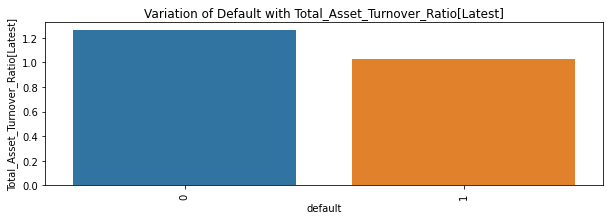

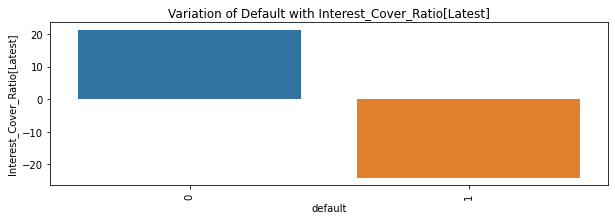

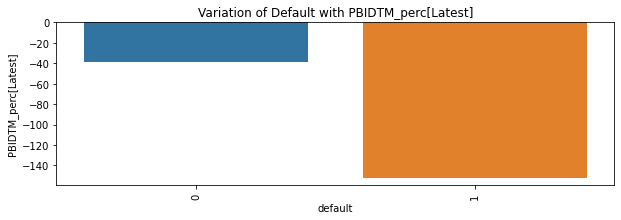

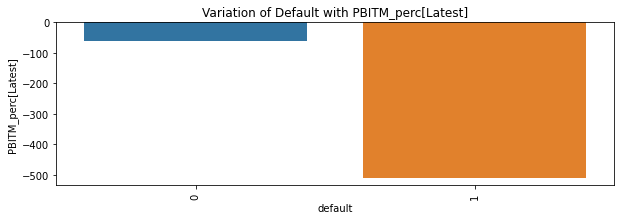

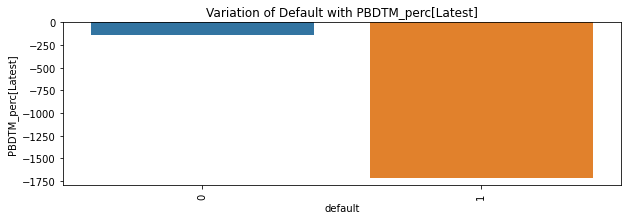

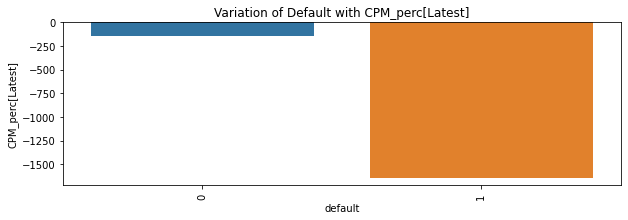

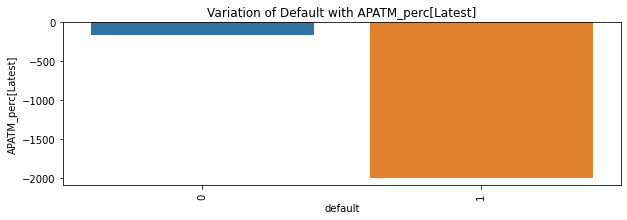

In [ ]:
for x in lst5:
    bivariateAnalysis(x)

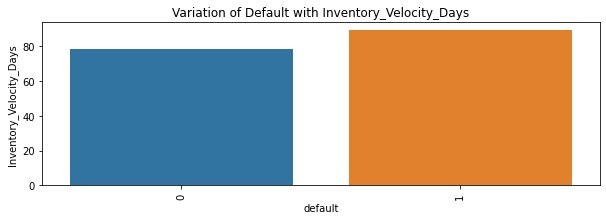

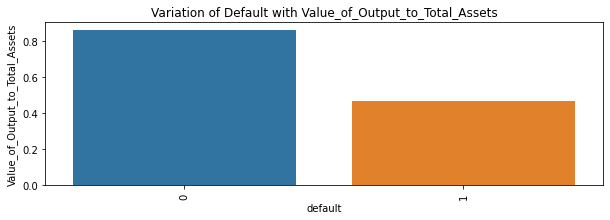

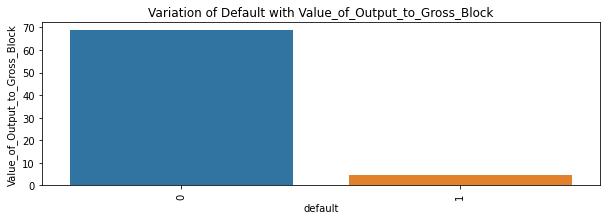

In [ ]:
for x in lst6:
    bivariateAnalysis(x)

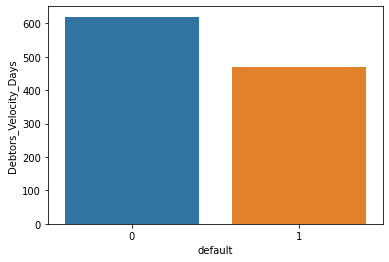

In [ ]:
sns.barplot(data=Company, x = 'default', y= 'Debtors_Velocity_Days', ci=None);    

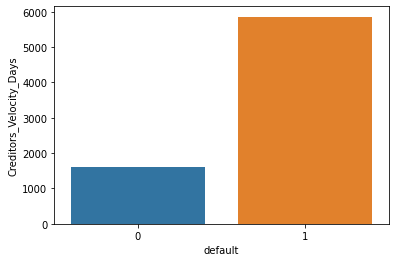

In [ ]:
sns.barplot(data=Company, x = 'default', y= 'Creditors_Velocity_Days', ci=None);    

In [ ]:
Company_new.isnull().sum().sum()

14

there are 118 missing values in the dataset

In [20]:
Company_X = Company_new.drop(['default', 'Co_Name', 'Co_Code', 'Networth_Next_Year', 'Equity_Paid_Up'], axis = 1)
Company_Y = Company_new['default']

In [21]:
pd.reset_option('display.max_columns')

In [22]:
pd.reset_option('display.max_rows')

In [23]:
Company_X

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,...,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00
1,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,...,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,0.31,0.24
2,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,...,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,-0.03,-0.26
3,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,...,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,0.24,1.90
4,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,...,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,48469.90,48469.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.60,7.76
3582,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,9050.59,80956.65,34312.88,32502.41,...,3.18,39.92,32.17,29.81,30.52,22.77,13,53,0.29,1.00
3583,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,83232.98,223919.73,474182.94,443775.16,...,8.60,8.09,6.69,7.31,5.69,4.29,7,30,1.42,3.24
3584,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,30903.80,204002.94,73906.58,73236.94,...,4.35,28.12,20.55,23.39,19.55,11.99,32,69,0.36,0.68


In [24]:
(Company_X != 0).sum().sum()

175128

In [25]:
(Company_X == 0).sum().sum()

18516

In [ ]:
18516/175128 * 100

10.57283815266548

In [29]:
Company_X[(Company_X == 0)] = np.nan

In [30]:
Company_X.isnull().sum().sum()

18530

Lets check the number of outliers every column in the dataset

In [31]:
Q1 = Company_X.quantile(0.20)
Q3 = Company_X.quantile(0.80)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [32]:
((Company_X > UL) | (Company_X < LL)).sum().sum()       #number of outliers in the Company_X

22666

In [33]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan      #converting outliers into NaN.

In [34]:
Company_X.isnull().sum()

Networth                                488
Capital_Employed                        446
Total_Debt                             1177
Gross_Block_                            723
Net_Working_Capital                     539
Current_Assets_                         456
Current_Liabilities_and_Provisions      517
Total_Assets_to_Liabilities             430
Gross_Sales                             662
Net_Sales                               664
Other_Income                           1040
Value_Of_Output                         651
Cost_of_Production                      539
Selling_Cost                           1250
PBIDT                                   604
PBDT                                    691
PBIT                                    658
PBT                                     794
PAT                                     808
Adjusted_PAT                            821
CP                                      691
Book_Value_Unit_Curr                    342
Book_Value_Adj._Unit_Curr       

In [35]:
Company_X.isnull().sum().sum()       # Number of total NaNs in Company_X (including outliers and actual NaNs) 

41196

In [36]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

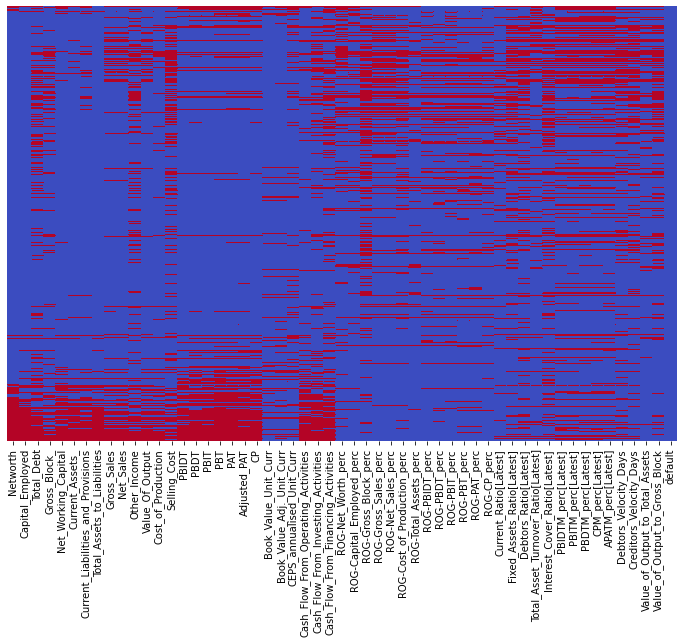

In [37]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

We should inspect total missing values by each row.

In [38]:
Company_sub1.isnull().sum(axis = 1)

0       34
1       25
2       31
3       29
4       29
        ..
3581    39
3582    25
3583    27
3584    24
3585    26
Length: 3586, dtype: int64

Let's filter the data which is 90% or more complete at the row level

In [39]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [40]:
Company_sub1_temp.shape

(1348, 55)

In [41]:
Company_sub1_temp['default'].value_counts()

0    1277
1      71
Name: default, dtype: int64

In [42]:
Company_sub1['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [43]:
71/388

0.18298969072164947

In [ ]:
1277/3198

0.39931207004377733

While we came down to 1277 rows from 3198 rows provided originally, we lose only 18.2% of the actual defaulters from the original data in the new subset. Therefore, All the NaN/missing values in the new subset (Company_sub1_temp) will be imputed with neighbor values using KNNimputer.

Before using KNNimputer (based on distance method), we need to scale the data.

In [44]:
predictors = Company_sub1_temp.drop('default', axis = 1)
response = Company_sub1_temp['default']

In [45]:
predictors

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
27,NaN,-104.42,290.05,180.20,-136.00,26.47,162.47,58.05,80.53,74.69,...,0.35,4.03,2.19,-2.28,-2.28,-4.11,17.00,286.00,1.00,0.37
38,NaN,-18.49,389.42,13.27,-31.65,12.07,43.71,25.22,27.32,24.74,...,0.42,7.94,6.79,-8.45,-8.42,-9.57,27.00,44.00,1.23,2.22
57,-199.12,218.13,364.74,430.16,91.74,166.69,74.95,293.08,372.72,333.73,...,-0.30,-2.67,-5.17,-19.70,-19.70,-22.20,87.00,97.00,0.81,0.54
68,-192.66,215.86,380.81,278.53,26.83,180.97,154.12,369.98,254.68,249.92,...,0.78,5.96,3.65,1.28,1.18,-1.13,145.00,180.00,1.11,1.44
73,-175.13,-82.21,53.90,155.16,NaN,75.27,228.40,146.18,103.79,94.43,...,1.26,13.81,8.18,7.30,7.30,1.66,113.00,47.00,0.67,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,264.71,567.65,297.57,522.44,153.55,203.82,50.28,617.93,222.97,222.97,...,6.33,20.64,3.94,20.02,34.94,18.23,179.00,47.00,0.40,0.52
3200,NaN,556.38,5.56,164.14,34.91,63.54,28.62,585.00,166.08,152.06,...,NaN,21.97,17.73,21.86,17.95,13.70,55.00,42.00,0.25,1.13
3278,NaN,NaN,324.40,524.17,-13.14,54.82,67.97,NaN,188.04,188.04,...,1.15,31.48,21.77,12.58,12.16,2.45,20.00,82.00,0.16,0.43
3310,NaN,NaN,446.52,15.97,108.62,131.12,22.50,NaN,15.14,15.14,...,-1.22,-7.68,-15.06,-19.98,17.91,10.53,NaN,132.00,0.01,0.64


In [46]:
predictors.index

Int64Index([  27,   38,   57,   68,   73,   83,   97,   98,  105,  108,
            ...
            3146, 3159, 3175, 3179, 3187, 3189, 3200, 3278, 3310, 3474],
           dtype='int64', length=1348)

In [47]:
predictors.columns

Index(['Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block_',
       'Net_Working_Capital', 'Current_Assets_',
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Book_Value_Unit_Curr',
       'Book_Value_Adj._Unit_Curr', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG-Net_Worth_perc',
       'ROG-Capital_Employed_perc', 'ROG-Gross_Block_perc',
       'ROG-Gross_Sales_perc', 'ROG-Net_Sales_perc',
       'ROG-Cost_of_Production_perc', 'ROG-Total_Assets_perc',
       'ROG-PBIDT_perc', 'ROG-PBDT_perc', 'ROG-PBIT_perc', 'ROG-PBT_perc',
       'ROG-PAT_perc', 'ROG-CP_perc', 'Current_Ratio[Latest]',
       'Fixed_Assets_Ratio[Latest]', 'Debtors_Ratio[Latest]'

In [48]:
response

27      1
38      1
57      1
68      1
73      1
       ..
3189    0
3200    0
3278    0
3310    0
3474    0
Name: default, Length: 1348, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns, index = predictors.index)

In [50]:
scaled_predictors

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
27,NaN,-1.64,3.56,1.04,-3.93,-0.51,3.29,-0.47,-0.33,-0.35,...,-0.57,-0.62,-0.54,-0.91,-0.98,-0.90,-0.97,4.34,-0.08,-0.81
38,NaN,-0.95,5.01,-0.58,-1.53,-0.69,0.34,-0.68,-0.62,-0.63,...,-0.56,-0.28,-0.09,-1.47,-1.68,-1.59,-0.81,-0.27,0.25,-0.25
57,-3.53,0.93,4.65,3.46,1.30,1.19,1.12,1.01,1.27,1.14,...,-0.70,-1.19,-1.27,-2.50,-2.97,-3.19,0.18,0.74,-0.36,-0.76
68,-3.44,0.91,4.88,1.99,-0.19,1.36,3.08,1.50,0.62,0.66,...,-0.49,-0.45,-0.40,-0.58,-0.58,-0.52,1.12,2.32,0.08,-0.49
73,-3.20,-1.46,0.11,0.80,NaN,0.08,4.92,0.09,-0.20,-0.23,...,-0.39,0.22,0.05,-0.03,0.12,-0.17,0.60,-0.21,-0.57,-0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2.98,3.71,3.67,4.35,2.71,1.64,0.50,3.06,0.45,0.50,...,0.63,0.81,-0.37,1.14,3.28,1.93,1.68,-0.21,-0.96,-0.76
3200,NaN,3.62,-0.59,0.89,-0.01,-0.06,-0.03,2.86,0.14,0.10,...,NaN,0.92,1.00,1.30,1.34,1.36,-0.35,-0.30,-1.18,-0.58
3278,NaN,NaN,4.06,4.37,-1.11,-0.17,0.94,NaN,0.26,0.30,...,-0.41,1.74,1.39,0.45,0.67,-0.07,-0.92,0.46,-1.32,-0.79
3310,NaN,NaN,5.84,-0.55,1.68,0.76,-0.18,NaN,-0.69,-0.69,...,-0.89,-1.63,-2.25,-2.53,1.33,0.96,NaN,1.41,-1.54,-0.73


In [51]:
Company_sub2_new = pd.concat([scaled_predictors, response], axis = 1)

In [52]:
Company_sub2_new

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
27,NaN,-1.64,3.56,1.04,-3.93,-0.51,3.29,-0.47,-0.33,-0.35,...,-0.62,-0.54,-0.91,-0.98,-0.90,-0.97,4.34,-0.08,-0.81,1
38,NaN,-0.95,5.01,-0.58,-1.53,-0.69,0.34,-0.68,-0.62,-0.63,...,-0.28,-0.09,-1.47,-1.68,-1.59,-0.81,-0.27,0.25,-0.25,1
57,-3.53,0.93,4.65,3.46,1.30,1.19,1.12,1.01,1.27,1.14,...,-1.19,-1.27,-2.50,-2.97,-3.19,0.18,0.74,-0.36,-0.76,1
68,-3.44,0.91,4.88,1.99,-0.19,1.36,3.08,1.50,0.62,0.66,...,-0.45,-0.40,-0.58,-0.58,-0.52,1.12,2.32,0.08,-0.49,1
73,-3.20,-1.46,0.11,0.80,NaN,0.08,4.92,0.09,-0.20,-0.23,...,0.22,0.05,-0.03,0.12,-0.17,0.60,-0.21,-0.57,-0.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2.98,3.71,3.67,4.35,2.71,1.64,0.50,3.06,0.45,0.50,...,0.81,-0.37,1.14,3.28,1.93,1.68,-0.21,-0.96,-0.76,0
3200,NaN,3.62,-0.59,0.89,-0.01,-0.06,-0.03,2.86,0.14,0.10,...,0.92,1.00,1.30,1.34,1.36,-0.35,-0.30,-1.18,-0.58,0
3278,NaN,NaN,4.06,4.37,-1.11,-0.17,0.94,NaN,0.26,0.30,...,1.74,1.39,0.45,0.67,-0.07,-0.92,0.46,-1.32,-0.79,0
3310,NaN,NaN,5.84,-0.55,1.68,0.76,-0.18,NaN,-0.69,-0.69,...,-1.63,-2.25,-2.53,1.33,0.96,NaN,1.41,-1.54,-0.73,0


In [53]:
from sklearn.impute import KNNImputer #MICE FancyImpute

In [54]:
imputer = KNNImputer(n_neighbors=10)

In [55]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub2_new), columns = Company_sub2_new.columns, index = Company_sub2_new.index)

In [56]:
Company_imputed

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,default
27,-0.90,-1.64,3.56,1.04,-3.93,-0.51,3.29,-0.47,-0.33,-0.35,...,-0.62,-0.54,-0.91,-0.98,-0.90,-0.97,4.34,-0.08,-0.81,1.00
38,-0.69,-0.95,5.01,-0.58,-1.53,-0.69,0.34,-0.68,-0.62,-0.63,...,-0.28,-0.09,-1.47,-1.68,-1.59,-0.81,-0.27,0.25,-0.25,1.00
57,-3.53,0.93,4.65,3.46,1.30,1.19,1.12,1.01,1.27,1.14,...,-1.19,-1.27,-2.50,-2.97,-3.19,0.18,0.74,-0.36,-0.76,1.00
68,-3.44,0.91,4.88,1.99,-0.19,1.36,3.08,1.50,0.62,0.66,...,-0.45,-0.40,-0.58,-0.58,-0.52,1.12,2.32,0.08,-0.49,1.00
73,-3.20,-1.46,0.11,0.80,-0.38,0.08,4.92,0.09,-0.20,-0.23,...,0.22,0.05,-0.03,0.12,-0.17,0.60,-0.21,-0.57,-0.73,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2.98,3.71,3.67,4.35,2.71,1.64,0.50,3.06,0.45,0.50,...,0.81,-0.37,1.14,3.28,1.93,1.68,-0.21,-0.96,-0.76,0.00
3200,1.89,3.62,-0.59,0.89,-0.01,-0.06,-0.03,2.86,0.14,0.10,...,0.92,1.00,1.30,1.34,1.36,-0.35,-0.30,-1.18,-0.58,0.00
3278,1.44,1.89,4.06,4.37,-1.11,-0.17,0.94,1.75,0.26,0.30,...,1.74,1.39,0.45,0.67,-0.07,-0.92,0.46,-1.32,-0.79,0.00
3310,-0.33,-0.46,5.84,-0.55,1.68,0.76,-0.18,-0.46,-0.69,-0.69,...,-1.63,-2.25,-2.53,1.33,0.96,-0.03,1.41,-1.54,-0.73,0.00


[link text](https://)Inspect possible correlations between independent variables

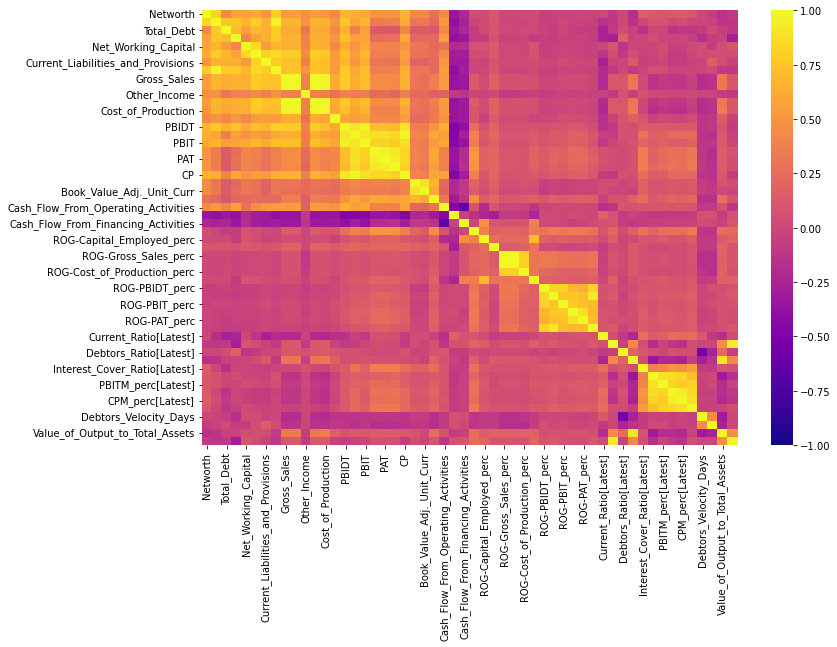

In [57]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [58]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [59]:
predictors

,Networth,Capital_Employed,Total_Debt,Gross_Block_,Net_Working_Capital,Current_Assets_,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,Gross_Sales,Net_Sales,...,Interest_Cover_Ratio[Latest],PBIDTM_perc[Latest],PBITM_perc[Latest],PBDTM_perc[Latest],CPM_perc[Latest],APATM_perc[Latest],Debtors_Velocity_Days,Creditors_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
27,-0.90,-1.64,3.56,1.04,-3.93,-0.51,3.29,-0.47,-0.33,-0.35,...,-0.57,-0.62,-0.54,-0.91,-0.98,-0.90,-0.97,4.34,-0.08,-0.81
38,-0.69,-0.95,5.01,-0.58,-1.53,-0.69,0.34,-0.68,-0.62,-0.63,...,-0.56,-0.28,-0.09,-1.47,-1.68,-1.59,-0.81,-0.27,0.25,-0.25
57,-3.53,0.93,4.65,3.46,1.30,1.19,1.12,1.01,1.27,1.14,...,-0.70,-1.19,-1.27,-2.50,-2.97,-3.19,0.18,0.74,-0.36,-0.76
68,-3.44,0.91,4.88,1.99,-0.19,1.36,3.08,1.50,0.62,0.66,...,-0.49,-0.45,-0.40,-0.58,-0.58,-0.52,1.12,2.32,0.08,-0.49
73,-3.20,-1.46,0.11,0.80,-0.38,0.08,4.92,0.09,-0.20,-0.23,...,-0.39,0.22,0.05,-0.03,0.12,-0.17,0.60,-0.21,-0.57,-0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2.98,3.71,3.67,4.35,2.71,1.64,0.50,3.06,0.45,0.50,...,0.63,0.81,-0.37,1.14,3.28,1.93,1.68,-0.21,-0.96,-0.76
3200,1.89,3.62,-0.59,0.89,-0.01,-0.06,-0.03,2.86,0.14,0.10,...,1.40,0.92,1.00,1.30,1.34,1.36,-0.35,-0.30,-1.18,-0.58
3278,1.44,1.89,4.06,4.37,-1.11,-0.17,0.94,1.75,0.26,0.30,...,-0.41,1.74,1.39,0.45,0.67,-0.07,-0.92,0.46,-1.32,-0.79
3310,-0.33,-0.46,5.84,-0.55,1.68,0.76,-0.18,-0.46,-0.69,-0.69,...,-0.89,-1.63,-2.25,-2.53,1.33,0.96,-0.03,1.41,-1.54,-0.73


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

### Splitting the data into train and test sets



In [61]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33, random_state = 42)

In [62]:
predictors.shape

(1348, 54)

In [63]:
X_train.shape

(903, 54)

In [64]:
903/1348

0.6698813056379822

In [65]:
X_test.shape

(445, 54)

In [66]:
445/1348

0.3301186943620178

### For modeling we will use Logistic Regression with statsmodels

In [ ]:
import statsmodels.api as sm

In [ ]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.603115
         Iterations 6


In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      849
Method:                           MLE   Df Model:                           53
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.738
Time:                        13:02:12   Log-Likelihood:                -544.61
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.4354      0.221     -1.970      0.049      -0.869      -0.002
Capital_Employed                        0.5629      1.20

In [ ]:
print(dir(log_reg))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_get_endog_name', '_get_robustcov_results', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_test', 'wald_test_terms']


In [ ]:
log_reg.pvalues > 0.98

Networth                               False
Capital_Employed                       False
Total_Debt                             False
Gross_Block_                           False
Net_Working_Capital                    False
Current_Assets_                        False
Current_Liabilities_and_Provisions     False
Total_Assets_to_Liabilities            False
Gross_Sales                            False
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
PAT                                    False
Adjusted_PAT                           False
CP                                     False
Book_Value_Unit_Curr                   False
Book_Value

In [ ]:
predictors1 = predictors.drop(['Cash_Flow_From_Operating_Activities', 'ROG-Gross_Block_perc'], axis = 1)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(predictors1, response, 
                                                    test_size = 0.33, random_state = 42)

In [ ]:
log_reg1 = sm.Logit(y_train1, X_train1).fit()

Optimization terminated successfully.
         Current function value: 0.603115
         Iterations 6


In [ ]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      851
Method:                           MLE   Df Model:                           51
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.738
Time:                        15:30:26   Log-Likelihood:                -544.61
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.4354      0.221     -1.970      0.049      -0.869      -0.002
Capital_Employed                        0.5621      1.20

In [ ]:
log_reg1.pvalues > 0.95

Networth                               False
Capital_Employed                       False
Total_Debt                             False
Gross_Block_                            True
Net_Working_Capital                    False
Current_Assets_                        False
Current_Liabilities_and_Provisions     False
Total_Assets_to_Liabilities            False
Gross_Sales                            False
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
PAT                                    False
Adjusted_PAT                           False
CP                                     False
Book_Value_Unit_Curr                   False
Book_Value

In [ ]:
predictors2 = predictors1.drop(['Gross_Block_', 'Debtors_Ratio[Latest]'], axis = 1)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(predictors2, response, 
                                                    test_size = 0.33, random_state = 42)

In [ ]:
log_reg2 = sm.Logit(y_train2, X_train2).fit()

Optimization terminated successfully.
         Current function value: 0.603116
         Iterations 6


In [ ]:
print(log_reg2.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      853
Method:                           MLE   Df Model:                           49
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.738
Time:                        15:35:52   Log-Likelihood:                -544.61
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.4349      0.220     -1.973      0.049      -0.867      -0.003
Capital_Employed                        0.5602      1.20

In [ ]:
log_reg2.pvalues > 0.90

Networth                               False
Capital_Employed                       False
Total_Debt                             False
Net_Working_Capital                    False
Current_Assets_                        False
Current_Liabilities_and_Provisions     False
Total_Assets_to_Liabilities            False
Gross_Sales                            False
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
PAT                                    False
Adjusted_PAT                            True
CP                                     False
Book_Value_Unit_Curr                   False
Book_Value_Adj._Unit_Curr              False
CEPS_annua

In [ ]:
predictors3 = predictors2.drop(['Adjusted_PAT', 'CEPS_annualised_Unit_Curr', 'ROG-Gross_Sales_perc', 'ROG-Total_Assets_perc'], axis = 1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(predictors3, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg3 = sm.Logit(y_train3, X_train3).fit()

Optimization terminated successfully.
         Current function value: 0.603139
         Iterations 6


In [ ]:
print(log_reg3.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      857
Method:                           MLE   Df Model:                           45
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.738
Time:                        15:43:27   Log-Likelihood:                -544.63
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.4298      0.217     -1.978      0.048      -0.856      -0.004
Capital_Employed                        0.5673      1.19

In [ ]:
log_reg3.pvalues > 0.70

Networth                               False
Capital_Employed                       False
Total_Debt                             False
Net_Working_Capital                    False
Current_Assets_                        False
Current_Liabilities_and_Provisions      True
Total_Assets_to_Liabilities            False
Gross_Sales                            False
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
PAT                                    False
CP                                     False
Book_Value_Unit_Curr                   False
Book_Value_Adj._Unit_Curr               True
Cash_Flow_From_Investing_Activities    False
Cash_Flow_

In [ ]:
predictors4 = predictors3.drop(['Current_Liabilities_and_Provisions', 'Book_Value_Adj._Unit_Curr', 'ROG-Net_Worth_perc', 
                                'ROG-PBDT_perc', 'ROG-PBT_perc', 'Creditors_Velocity_Days'], axis = 1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(predictors4, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg4 = sm.Logit(y_train4, X_train4).fit()

Optimization terminated successfully.
         Current function value: 0.603386
         Iterations 6


In [ ]:
print(log_reg4.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      863
Method:                           MLE   Df Model:                           39
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.739
Time:                        16:03:08   Log-Likelihood:                -544.86
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.4227      0.216     -1.957      0.050      -0.846       0.001
Capital_Employed                        0.4025      0.67

In [ ]:
log_reg4.pvalues > 0.55

Networth                               False
Capital_Employed                        True
Total_Debt                             False
Net_Working_Capital                    False
Current_Assets_                        False
Total_Assets_to_Liabilities            False
Gross_Sales                             True
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
PAT                                     True
CP                                     False
Book_Value_Unit_Curr                   False
Cash_Flow_From_Investing_Activities    False
Cash_Flow_From_Financing_Activities     True
ROG-Capital_Employed_perc              False
ROG-Net_Sa

In [ ]:
predictors5 = predictors4.drop(['Capital_Employed', 'Gross_Sales', 'PAT', 
                                'Cash_Flow_From_Financing_Activities', 'ROG-Cost_of_Production_perc', 'ROG-CP_perc',
                                'Fixed_Assets_Ratio[Latest]', 'Total_Asset_Turnover_Ratio[Latest]'], axis = 1)
X_train5, X_test5, y_train5, y_test5 = train_test_split(predictors5, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg5 = sm.Logit(y_train5, X_train5).fit()

Optimization terminated successfully.
         Current function value: 0.604521
         Iterations 6


In [ ]:
print(log_reg5.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      871
Method:                           MLE   Df Model:                           31
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.744
Time:                        16:10:08   Log-Likelihood:                -545.88
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Networth                               -0.3766      0.208     -1.814      0.070      -0.784       0.030
Total_Debt                              0.8609      0.24

In [ ]:
log_reg5.pvalues > 0.30

Networth                               False
Total_Debt                             False
Net_Working_Capital                    False
Current_Assets_                        False
Total_Assets_to_Liabilities             True
Net_Sales                              False
Other_Income                           False
Value_Of_Output                        False
Cost_of_Production                     False
Selling_Cost                           False
PBIDT                                  False
PBDT                                   False
PBIT                                   False
PBT                                    False
CP                                      True
Book_Value_Unit_Curr                   False
Cash_Flow_From_Investing_Activities     True
ROG-Capital_Employed_perc               True
ROG-Net_Sales_perc                      True
ROG-PBIDT_perc                          True
ROG-PBIT_perc                          False
ROG-PAT_perc                           False
Current_Ra

In [ ]:
predictors6 = predictors5.drop(['Total_Assets_to_Liabilities', 'CP', 'Cash_Flow_From_Investing_Activities', 
                                'ROG-Capital_Employed_perc', 'ROG-Net_Sales_perc', 'ROG-PBIDT_perc',
                                'PBDTM_perc[Latest]'], axis = 1)
X_train6, X_test6, y_train6, y_test6 = train_test_split(predictors6, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg6 = sm.Logit(y_train6, X_train6).fit()

Optimization terminated successfully.
         Current function value: 0.607402
         Iterations 6


In [ ]:
print(log_reg6.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                           24
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.758
Time:                        16:17:11   Log-Likelihood:                -548.48
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Networth                           -0.5553      0.139     -4.007      0.000      -0.827      -0.284
Total_Debt                          0.7014      0.198      3.551    

In [ ]:
log_reg6.pvalues > 0.15

Networth                           False
Total_Debt                         False
Net_Working_Capital                False
Current_Assets_                    False
Net_Sales                          False
Other_Income                       False
Value_Of_Output                     True
Cost_of_Production                 False
Selling_Cost                       False
PBIDT                              False
PBDT                               False
PBIT                                True
PBT                                False
Book_Value_Unit_Curr               False
ROG-PBIT_perc                      False
ROG-PAT_perc                        True
Current_Ratio[Latest]              False
Interest_Cover_Ratio[Latest]        True
PBIDTM_perc[Latest]                False
PBITM_perc[Latest]                 False
CPM_perc[Latest]                   False
APATM_perc[Latest]                 False
Debtors_Velocity_Days              False
Value_of_Output_to_Total_Assets    False
Value_of_Output_

In [ ]:
predictors7 = predictors6.drop(['Value_Of_Output', 'PBIT', 'ROG-PAT_perc', 'Interest_Cover_Ratio[Latest]'], axis = 1)
X_train7, X_test7, y_train7, y_test7 = train_test_split(predictors7, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg7 = sm.Logit(y_train7, X_train7).fit()

Optimization terminated successfully.
         Current function value: 0.611147
         Iterations 6


In [ ]:
print(log_reg7.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                           20
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.775
Time:                        16:22:20   Log-Likelihood:                -551.87
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Networth                           -0.5824      0.140     -4.165      0.000      -0.856      -0.308
Total_Debt                          0.6369      0.190      3.352    

In [ ]:
log_reg7.pvalues > 0.10

Networth                           False
Total_Debt                         False
Net_Working_Capital                False
Current_Assets_                    False
Net_Sales                          False
Other_Income                        True
Cost_of_Production                 False
Selling_Cost                       False
PBIDT                              False
PBDT                               False
PBT                                 True
Book_Value_Unit_Curr               False
ROG-PBIT_perc                       True
Current_Ratio[Latest]              False
PBIDTM_perc[Latest]                 True
PBITM_perc[Latest]                 False
CPM_perc[Latest]                   False
APATM_perc[Latest]                 False
Debtors_Velocity_Days              False
Value_of_Output_to_Total_Assets    False
Value_of_Output_to_Gross_Block     False
dtype: bool

In [ ]:
predictors8 = predictors7.drop(['Other_Income', 'PBT', 'ROG-PBIT_perc', 'PBIDTM_perc[Latest]'], axis = 1)
X_train8, X_test8, y_train8, y_test8 = train_test_split(predictors8, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg8 = sm.Logit(y_train8, X_train8).fit()

Optimization terminated successfully.
         Current function value: 0.615698
         Iterations 6


In [ ]:
print(log_reg8.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                           16
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.795
Time:                        16:25:59   Log-Likelihood:                -555.98
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Networth                           -0.4942      0.131     -3.780      0.000      -0.750      -0.238
Total_Debt                          0.6996      0.189      3.708    

In [ ]:
predictors9 = predictors8.drop(['Current_Ratio[Latest]'], axis = 1)
X_train9, X_test9, y_train9, y_test9 = train_test_split(predictors9, response, 
                                                    test_size = 0.33, random_state = 42)
log_reg9 = sm.Logit(y_train9, X_train9).fit()

Optimization terminated successfully.
         Current function value: 0.617772
         Iterations 6


In [ ]:
print(log_reg9.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  903
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  -1.805
Time:                        16:28:24   Log-Likelihood:                -557.85
converged:                       True   LL-Null:                       -198.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Networth                           -0.4992      0.131     -3.801      0.000      -0.757      -0.242
Total_Debt                          0.7335      0.189      3.881    

### In the above stats summary, it can be seen that all the features are statictically significant with more than 95% of significance level (p-value < 0.05).

In [ ]:
# performing predictions on the test datdaset
yhat = log_reg9.predict(X_test9)
prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Actual values', list(y_test9.values))
print('Predictions :', prediction)

Actual values [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
cm = confusion_matrix(y_test9, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test9, prediction))

Confusion Matrix : 
 [[290 136]
 [  1  18]]
Test accuracy =  0.6921348314606741


### Now we will use Logistic Regression with recursive feature elimination

In [ ]:
LogR = LogisticRegression()

In [ ]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [ ]:
selector = selector.fit(X_train, y_train)

In [ ]:
selector.n_features_

15

In [ ]:
selector.ranking_

array([ 1,  5, 17,  1,  1, 10, 27, 16,  1, 22, 15, 30, 40, 37, 13,  1, 20,
        4,  1,  1, 23,  1,  1,  3, 14, 35,  1, 32, 24,  1, 36, 12, 31, 34,
        1, 28, 25,  6,  7,  1,  1, 18, 21, 38, 39, 29, 33,  2,  9,  8, 11,
       26, 19,  1])

In [ ]:
df = pd.DataFrame({'Feature': predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Networth,1
3,Gross_Block_,1
4,Net_Working_Capital,1
8,Gross_Sales,1
15,PBDT,1
18,PAT,1
19,Adjusted_PAT,1
21,Book_Value_Unit_Curr,1
22,Book_Value_Adj._Unit_Curr,1
26,Cash_Flow_From_Financing_Activities,1


Validating the model on train and test set

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [ ]:
print(confusion_matrix(y_train, pred_train))

[[850   1]
 [  9  43]]


In [ ]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       851
         1.0       0.98      0.83      0.90        52

    accuracy                           0.99       903
   macro avg       0.98      0.91      0.94       903
weighted avg       0.99      0.99      0.99       903



In [ ]:
print(confusion_matrix(y_test, pred_test))

[[425   1]
 [ 13   6]]


In [ ]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       426
         1.0       0.86      0.32      0.46        19

    accuracy                           0.97       445
   macro avg       0.91      0.66      0.72       445
weighted avg       0.97      0.97      0.96       445



In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
selector_smote = selector.fit(X_res, y_res)

In [ ]:
selector_smote.n_features_

15

In [ ]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [ ]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       851
         1.0       0.97      0.99      0.98       851

    accuracy                           0.98      1702
   macro avg       0.98      0.98      0.98      1702
weighted avg       0.98      0.98      0.98      1702



In [ ]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       426
         1.0       0.50      0.79      0.61        19

    accuracy                           0.96       445
   macro avg       0.75      0.88      0.79       445
weighted avg       0.97      0.96      0.96       445



### Finally, we are able to achieve a descent recall value without overfitting. Considering the opportunities such as outliers, missing values and correlated features this is a fairly good model. It can be improved if we get better quality data where the features explaining the default are not missing or containing zeroes to this extent. Of course we can try other techniques which are not sensitive towards missing values and outliers.

### It can be observed that the Performance of Logistic Regression is far better with the Feature elimination using Recursive Feature elimination (model accuracy on test data = 0.97) than that of Statsmodels (model accuracy = 0.69)

Employing GridSearchCV to find a set of hyperparameters that best fit the data according to the scoring metric that we want our model to optimize on.

In [94]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid={'penalty':['l1','l2','none'],
      'C'       : np.logspace(-3,3,7),
      'solver':['newton-cg', 'lbfgs','liblinear'],
      'tol':[0.0001,0.000001]}

In [ ]:
LR=LogisticRegression(max_iter=100000,n_jobs=1)

In [ ]:
grid_search=GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, scoring='recall', cv = 10)

In [ ]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000, n_jobs=1),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='recall')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 0.001, 'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(C=0.001, max_iter=100000, n_jobs=1, penalty='none')


In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
y_train_predict = best_grid.predict(X_train)
y_test_predict = best_grid.predict(X_test)

In [ ]:
y_test_predict_prob = best_grid.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,1.00,0.00


In [ ]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       851
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In [ ]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       426
         1.0       0.59      0.53      0.56        19

    accuracy                           0.96       445
   macro avg       0.78      0.75      0.77       445
weighted avg       0.96      0.96      0.96       445



In [ ]:
grid_search.fit(X_res, y_res)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=100000, n_jobs=1),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='recall')

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(C=0.001, max_iter=100000, n_jobs=1, solver='liblinear')


In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
y_train_predict = best_grid.predict(X_res)
y_test_predict = best_grid.predict(X_test)

In [ ]:
y_test_predict_prob = best_grid.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.46,0.54
1,0.76,0.24
2,0.76,0.24
3,0.35,0.65
4,0.79,0.21


In [ ]:
print(classification_report(y_res,y_train_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74       851
         1.0       0.71      1.00      0.83       851

    accuracy                           0.80      1702
   macro avg       0.85      0.80      0.79      1702
weighted avg       0.85      0.80      0.79      1702



In [ ]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74       426
         1.0       0.10      1.00      0.18        19

    accuracy                           0.61       445
   macro avg       0.55      0.79      0.46       445
weighted avg       0.96      0.61      0.72       445



### LINEAR DISCRIMINANT ANALYSIS

In [67]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [68]:
lda = LinearDiscriminantAnalysis()

In [69]:
model = lda.fit(X_train,y_train)

In [70]:
pred_class_train = model.predict(X_train)

In [71]:
pred_class_test = model.predict(X_test)

In [72]:
pred_prob_train = model.predict_proba(X_train)

In [73]:
pred_prob_test = model.predict_proba(X_test)


LDA model performance on the training data:


In [74]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.9678848283499446

In [77]:
print(classification_report(y_train,pred_class_train))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       851
         1.0       0.79      0.60      0.68        52

    accuracy                           0.97       903
   macro avg       0.89      0.79      0.83       903
weighted avg       0.97      0.97      0.97       903



In [78]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve, plot_confusion_matrix

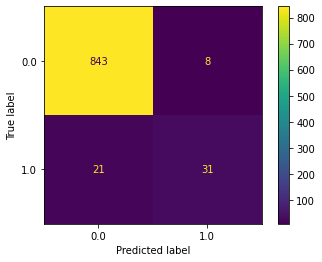

In [79]:
plot_confusion_matrix(model, X_train, y_train);


LDA model performance on the test data:


In [80]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.9550561797752809

In [81]:
print(classification_report(y_test,pred_class_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       426
         1.0       0.40      0.11      0.17        19

    accuracy                           0.96       445
   macro avg       0.68      0.55      0.57       445
weighted avg       0.94      0.96      0.94       445



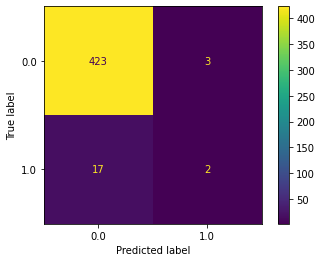

In [82]:
plot_confusion_matrix(model, X_test, y_test);

Recall and precision both are very low, implying that the model is not performing well on the new set in predicting correctly. Also, data set is an unbalanced one. Employing SMOTE here to increase the number of minor class to balance the dataset and training the model on the new training set and validating on the test set to to check how the model is performing.

In [83]:
from imblearn.over_sampling import SMOTE
sm_lda = SMOTE(random_state=33)
X_lda, y_lda = sm_lda.fit_resample(X_train, y_train)

In [84]:
lda_smote = lda.fit(X_lda, y_lda)

In [85]:
pred_train_smote = lda_smote.predict(X_lda)
pred_test_smote = lda_smote.predict(X_test)

In [86]:
print(classification_report(y_lda, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       851
         1.0       0.92      0.97      0.95       851

    accuracy                           0.95      1702
   macro avg       0.95      0.95      0.95      1702
weighted avg       0.95      0.95      0.95      1702



In [87]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       426
         1.0       0.27      0.79      0.40        19

    accuracy                           0.90       445
   macro avg       0.63      0.85      0.67       445
weighted avg       0.96      0.90      0.92       445



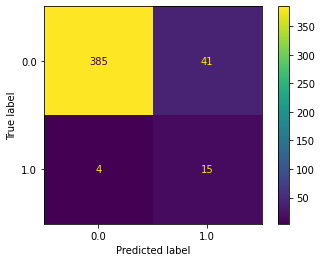

In [88]:
plot_confusion_matrix(lda_smote, X_test, y_test);

In [89]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [90]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [102]:
grid = {"solver" : ['svd', 'lsqr', 'eigen'], "tol" : [0.0001,0.0002,0.0000001]}
        #"C" : np.logspace(-3,3,7), "penalty": ['l1', 'l2', 'none']}

In [103]:
model = LinearDiscriminantAnalysis()

In [104]:
gsLDA = GridSearchCV(model, param_grid = grid, cv=cv,
                     scoring="recall", n_jobs= -1)

In [105]:
gsLDA.fit(X_lda, y_lda)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.0002, 1e-07]},
             scoring='recall')

In [101]:
LinearDiscriminantAnalysis().get_params().keys()

dict_keys(['covariance_estimator', 'n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

In [106]:
print(gsLDA.best_params_,'\n')
print(gsLDA.best_estimator_)

{'solver': 'svd', 'tol': 0.0001} 

LinearDiscriminantAnalysis()


In [108]:
best_grid = gsLDA.best_estimator_

In [109]:
y_train_predict = best_grid.predict(X_lda)
y_test_predict = best_grid.predict(X_test)

In [110]:
print(classification_report(y_lda,y_train_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95       851
         1.0       0.92      0.97      0.95       851

    accuracy                           0.95      1702
   macro avg       0.95      0.95      0.95      1702
weighted avg       0.95      0.95      0.95      1702



In [111]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       426
         1.0       0.27      0.79      0.40        19

    accuracy                           0.90       445
   macro avg       0.63      0.85      0.67       445
weighted avg       0.96      0.90      0.92       445

